In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn import cluster
%matplotlib inline

In [74]:
df=pd.read_csv("c_3.csv")
df.drop(columns=["Unnamed: 0","IndividualTobaccoRate"],inplace=True)
df.tail(20)

PlanId     BenefitName  BusinessYear_x  CoinsInnTier1  \
6725640  38234VA0060014  Rehabilitation            2014            0.2   
6725641  38234VA0060014  Rehabilitation            2014            0.2   
6725642  38234VA0060014  Rehabilitation            2014            0.2   
6725643  38234VA0060014  Rehabilitation            2014            0.2   
6725644  38234VA0060014  Rehabilitation            2014            0.2   
6725645  38234VA0060014  Rehabilitation            2014            0.2   
6725646  38234VA0060014  Rehabilitation            2014            0.2   
6725647  38234VA0060014  Rehabilitation            2014            0.2   
6725648  38234VA0060014  Rehabilitation            2014            0.2   
6725649  38234VA0060014  Rehabilitation            2014            0.2   
6725650  38234VA0060014  Rehabilitation            2014            0.2   
6725651  38234VA0060014  Rehabilitation            2014            0.2   
6725652  38234VA0060014  Rehabilitation            2014            0.2   
6725653  38234VA0060014  Rehabilitation            2014            0.2   
6725654  38234VA0060014  Rehabilitation            2014            0.2   
6725655  38234VA0060014  Rehabilitation            2014            0.2   
6725656  38234VA0060014  Rehabilitation            2014            0.2   
6725657  38234VA0060014  Rehabilitation            2014            0.2   
6725658  38234VA0060014  Rehabilitation            2014            0.2   
6725659  38234VA0060014  Rehabilitation            2014            0.2   

         CoinsOutofNet  CopayInnTier1  CopayOutofNet  LimitQty StateCode  \
6725640            0.5              0              0        30        VA   
6725641            0.5              0              0        30        VA   
6725642            0.5              0              0        30        VA   
6725643            0.5              0              0        30        VA   
6725644            0.5              0              0        30        VA   
6725645            0.5              0              0        30        VA   
6725646            0.5              0              0        30        VA   
6725647            0.5              0              0        30        VA   
6725648            0.5              0              0        30        VA   
6725649            0.5              0              0        30        VA   
6725650            0.5              0              0        30        VA   
6725651            0.5              0              0        30        VA   
6725652            0.5              0              0        30        VA   
6725653            0.5              0              0        30        VA   
6725654            0.5              0              0        30        VA   
6725655            0.5              0              0        30        VA   
6725656            0.5              0              0        30        VA   
6725657            0.5              0              0        30        VA   
6725658            0.5              0              0        30        VA   
6725659            0.5              0              0        30        VA   

         Tobacco  Age  IndividualRate  
6725640        0   46          1795.0  
6725641        0   47          1871.0  
6725642        0   48          1957.0  
6725643        0   49          2042.0  
6725644        0   50          2138.0  
6725645        0   51          2232.0  
6725646        0   52          2336.0  
6725647        0   53          2442.0  
6725648        0   54          2555.0  
6725649        0   55          2669.0  
6725650        0   56          2792.0  
6725651        0   57          2917.0  
6725652        0   58          3050.0  
6725653        0   59          3115.0  
6725654        0   60          3248.0  
6725655        0   61          3363.0  
6725656        0   62          3439.0  
6725657        0   63          3533.0  
6725658        0   64          3583.0  
6725659        0   65          3583.0

In [75]:
df.isnull().sum()

PlanId            0
BenefitName       0
BusinessYear_x    0
CoinsInnTier1     0
CoinsOutofNet     0
CopayInnTier1     0
CopayOutofNet     0
LimitQty          0
StateCode         0
Tobacco           0
Age               0
IndividualRate    0
dtype: int64

In [76]:
df.nunique()

PlanId             1572
BenefitName          37
BusinessYear_x        1
CoinsInnTier1        13
CoinsOutofNet        15
CopayInnTier1        13
CopayOutofNet         5
LimitQty             48
StateCode            29
Tobacco               2
Age                  46
IndividualRate    89666
dtype: int64

In [77]:
df.describe()

BusinessYear_x  CoinsInnTier1  CoinsOutofNet  CopayInnTier1  \
count       6725660.0   6.725660e+06   6.725660e+06   6.725660e+06   
mean           2014.0   2.089071e-01   8.142087e-01   7.642637e+00   
std               0.0   1.372747e-01   2.601934e-01   6.280533e+01   
min            2014.0   0.000000e+00   0.000000e+00   0.000000e+00   
25%            2014.0   1.500000e-01   5.000000e-01   0.000000e+00   
50%            2014.0   2.000000e-01   1.000000e+00   0.000000e+00   
75%            2014.0   3.000000e-01   1.000000e+00   0.000000e+00   
max            2014.0   1.000000e+00   1.000000e+00   1.000000e+03   

       CopayOutofNet      LimitQty       Tobacco           Age  IndividualRate  
count   6.725660e+06  6.725660e+06  6.725660e+06  6.725660e+06    6.725660e+06  
mean    2.043294e-01  1.712213e+02  6.223924e-04  4.250000e+01    4.743333e+02  
std     9.688491e+00  6.143448e+02  2.494003e-02  1.327592e+01    2.299117e+02  
min     0.000000e+00  1.000000e+00  0.000000e+00  2.000000e+01    5.566000e+01  
25%     0.000000e+00  6.000000e+00  0.000000e+00  3.100000e+01    3.107300e+02  
50%     0.000000e+00  3.000000e+01  0.000000e+00  4.250000e+01    4.082000e+02  
75%     0.000000e+00  6.000000e+01  0.000000e+00  5.400000e+01    5.930700e+02  
max     5.000000e+02  5.000000e+03  1.000000e+00  6.500000e+01    4.216000e+03

C:\Users\tomis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


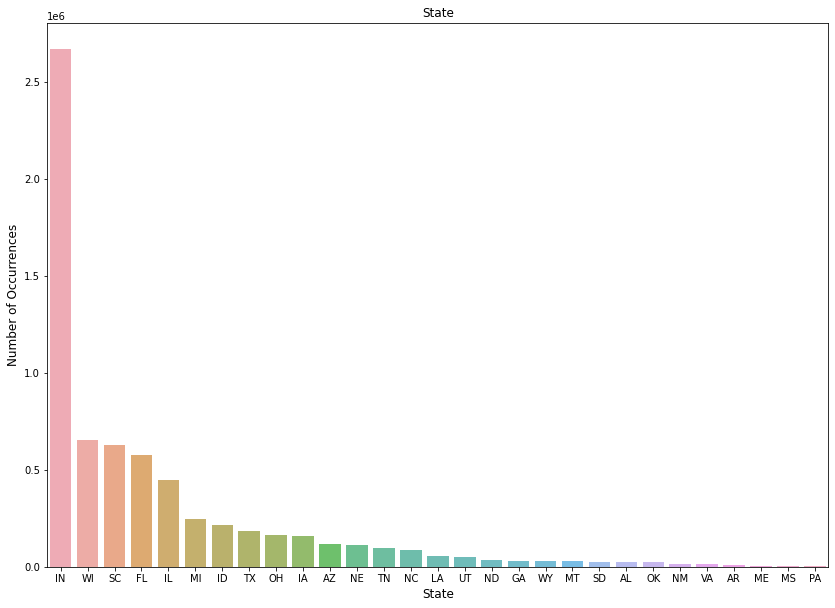

In [78]:

state  = df['StateCode'].value_counts()
plt.figure(figsize=(14,10))
sns.barplot(state.index, state.values, alpha=0.8)
plt.title('State')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.show()

C:\Users\tomis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tomis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tomis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

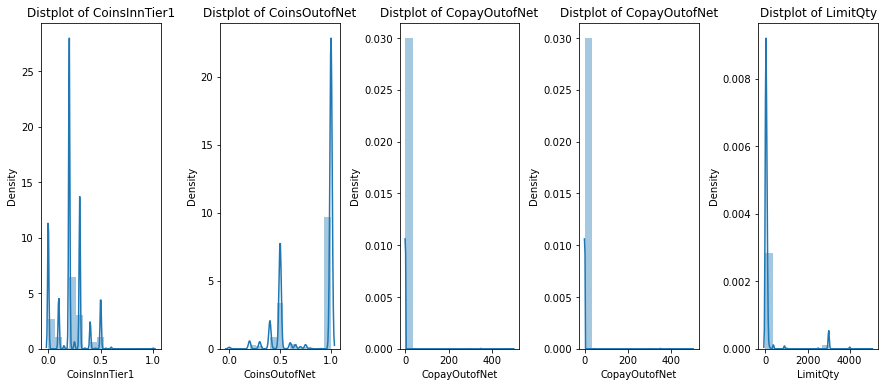

In [79]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['CoinsInnTier1' , 'CoinsOutofNet' , 'CopayOutofNet','CopayOutofNet','LimitQty']:
    n += 1
    plt.subplot(1 , 5 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

C:\Users\tomis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CoinsInnTier1'>

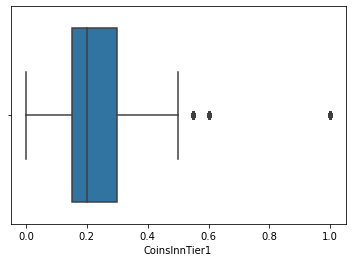

In [80]:

sns.boxplot(df['CoinsInnTier1'])

C:\Users\tomis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CoinsOutofNet'>

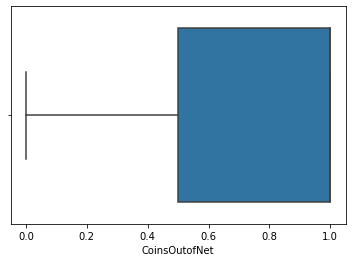

In [81]:
sns.boxplot(df['CoinsOutofNet'])

C:\Users\tomis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CopayInnTier1'>

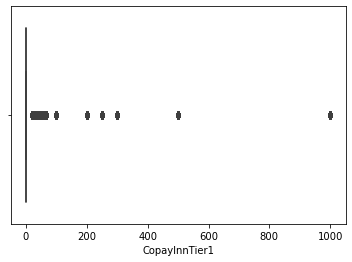

In [82]:
sns.boxplot(df['CopayInnTier1'])

C:\Users\tomis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CopayOutofNet'>

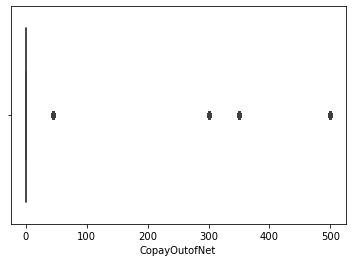

In [83]:
sns.boxplot(df['CopayOutofNet'])

C:\Users\tomis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LimitQty'>

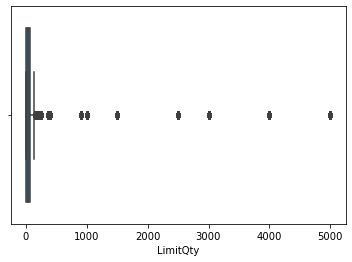

In [84]:
sns.boxplot(df['LimitQty'])

C:\Users\tomis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

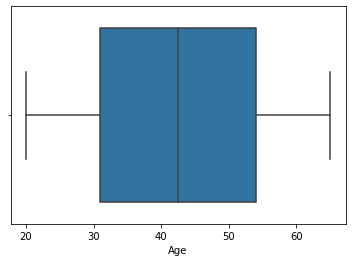

In [85]:
sns.boxplot(df['Age'])

C:\Users\tomis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IndividualRate'>

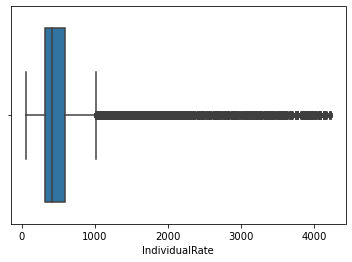

In [86]:
sns.boxplot(df['IndividualRate'])

In [91]:
result = df.groupby('Age').agg({'IndividualRate': ['mean', 'min', 'max']})
  
print("Mean, min, and max values of IndividualRate grouped by Age")
print(result)

Mean, min, and max values of IndividualRate grouped by Age
    IndividualRate                
              mean     min     max
Age                               
20      182.888144   55.66   894.0
21      287.755704   87.65  1408.0
22      287.818002   87.65  1408.0
23      287.896522   87.65  1408.0
24      287.993733   87.65  1408.0
25      289.299497   88.00  1414.0
26      295.067972   89.75  1442.0
27      301.962626   91.86  1476.0
28      313.178014   95.27  1531.0
29      322.206821   98.08  1576.0
30      326.898991   99.48  1598.0
31      333.759291  101.58  1632.0
32      340.620251  103.69  1666.0
33      344.974210  105.00  1687.0
34      349.489332  106.41  1709.0
35      351.835232  107.11  1721.0
36      354.003334  107.81  1732.0
37      356.366784  108.51  1743.0
38      358.739490  109.21  1754.0
39      363.284772  110.61  1777.0
40      368.012960  112.02  1799.0
41      374.919979  114.12  1833.0
42      381.500163  116.13  1866.0
43      390.774159  118.94  191

In [92]:
result = df.groupby('Tobacco').agg({'IndividualRate': ['mean', 'min', 'max']})
  
print("Mean, min, and max values of IndividualRate grouped by Tobacco")
print(result)

Mean, min, and max values of IndividualRate grouped by Tobacco
        IndividualRate                
                  mean     min     max
Tobacco                               
0           474.295410   55.66  4216.0
1           535.201713  176.95  1160.1


In [93]:
result = df.groupby('StateCode').agg({'IndividualRate': ['mean', 'min', 'max']})
  
print("Mean, min, and max values of IndividualRate grouped by State")
print(result)

Mean, min, and max values of IndividualRate grouped by State
          IndividualRate                 
                    mean     min      max
StateCode                                
AL            362.143377   89.85   965.46
AR            364.227260  103.82   994.89
AZ            486.049609   91.25  1758.61
FL            405.499532   96.17  1314.53
GA            404.574112  108.16  1160.10
IA            417.305013   78.78  1102.44
ID            414.533014   98.56  1137.00
IL            480.322120   68.90  1349.67
IN            524.957331   91.69  1339.34
LA            486.106481  118.37  1164.09
ME            605.901870  182.68  1326.36
MI            445.012412   76.70  1419.41
MS            476.863681  130.14  1245.08
MT            395.439794   98.46  1017.35
NC            393.850269   87.23  1141.23
ND            375.585849  114.13   821.73
NE            391.391183   86.09  1022.01
NM            333.887391   80.43   875.85
OH            451.679292   98.20  1193.95
OK            2

In [94]:
result = df.groupby('BenefitName').agg({'IndividualRate': ['mean', 'min', 'max']})
  
print("Mean, min, and max values of IndividualRate grouped by Benefit")
print(result)

Mean, min, and max values of IndividualRate grouped by Benefit
                                                   IndividualRate          \
                                                             mean     min   
BenefitName                                                                 
Acupuncture                                            489.793936   80.43   
Allergy Testing                                        293.982669   93.88   
Applied Behavior Analysis Based Therapies              605.901870  182.68   
Bariatric Surgery                                      483.209676   76.70   
Chiropractic Care                                      463.050597   55.66   
Cochlear Implants                                      477.784521  103.82   
Cosmetic Surgery                                       333.648551  110.00   
Delivery and All Inpatient Services for Materni...     431.444662   98.20   
Dental                                                 514.884580   87.23   
Diabetes Educ

<AxesSubplot:title={'center':'IndividualRate'}, xlabel='Age'>

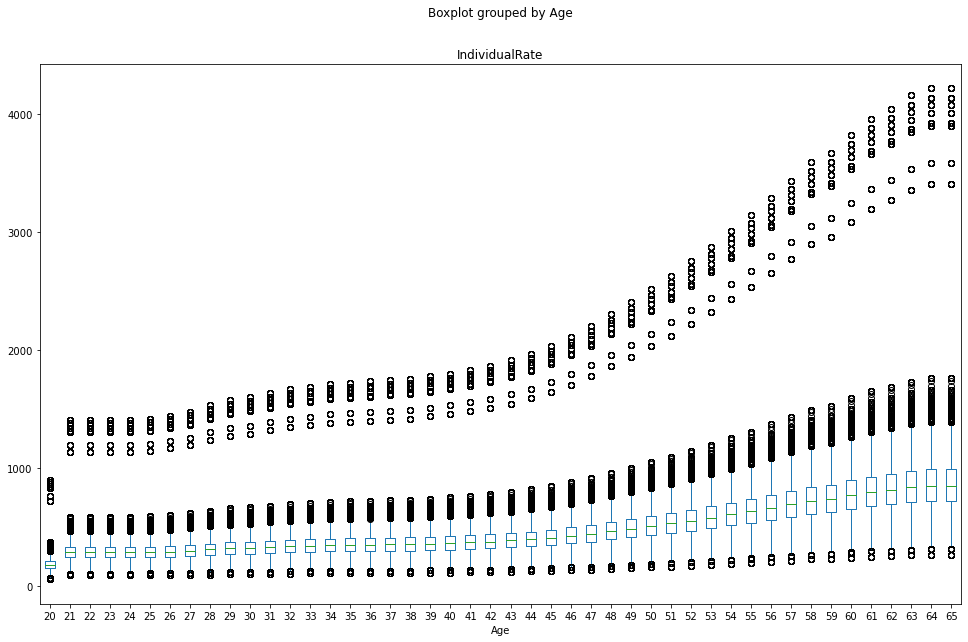

In [104]:
df.boxplot(by ='Age', column =['IndividualRate'], grid = False,figsize = (16 ,10))

In [99]:
label_encoder = preprocessing.LabelEncoder() 
df['StateCode'] = label_encoder.fit_transform(df['StateCode'])

<AxesSubplot:title={'center':'IndividualRate'}, xlabel='Tobacco'>

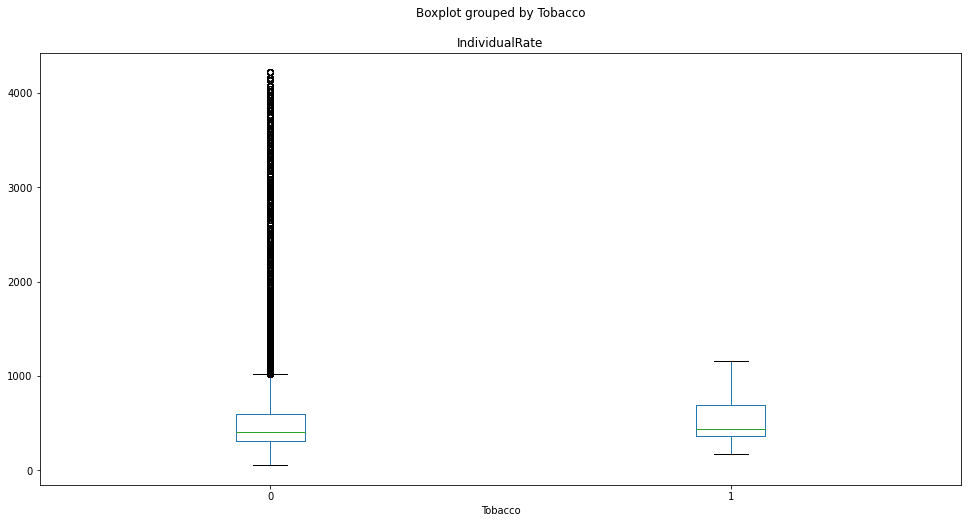

In [101]:
df.boxplot(by ='Tobacco', column =['IndividualRate'], grid = False,figsize = (16 ,8))

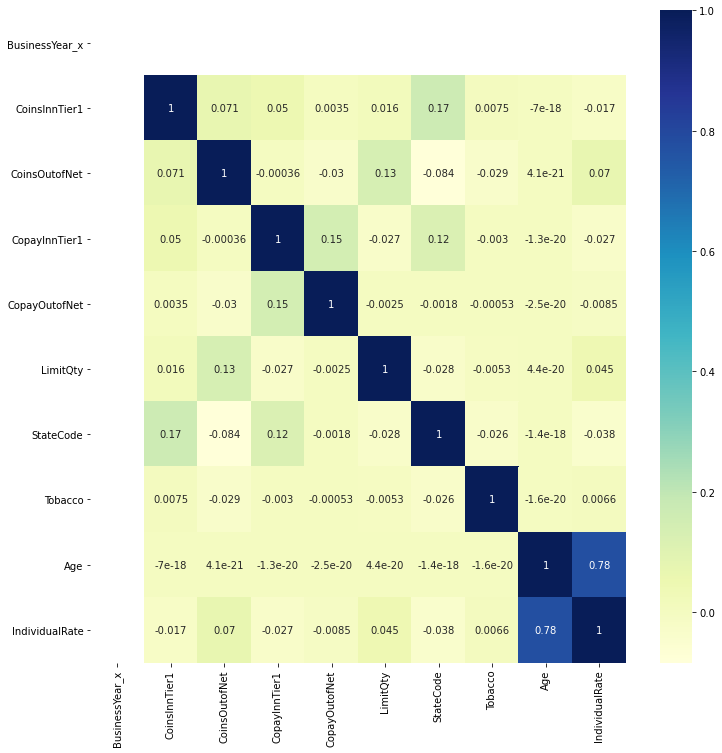

                BusinessYear_x  CoinsInnTier1  CoinsOutofNet  CopayInnTier1  \
BusinessYear_x             NaN            NaN            NaN            NaN   
CoinsInnTier1              NaN   1.000000e+00   7.098585e-02   5.036447e-02   
CoinsOutofNet              NaN   7.098585e-02   1.000000e+00  -3.579285e-04   
CopayInnTier1              NaN   5.036447e-02  -3.579285e-04   1.000000e+00   
CopayOutofNet              NaN   3.491270e-03  -2.978877e-02   1.455782e-01   
LimitQty                   NaN   1.608063e-02   1.327153e-01  -2.745372e-02   
StateCode                  NaN   1.677333e-01  -8.359647e-02   1.230595e-01   
Tobacco                    NaN   7.470407e-03  -2.866069e-02  -3.036786e-03   
Age                        NaN  -6.982085e-18   4.090612e-21  -1.261477e-20   
IndividualRate             NaN  -1.683975e-02   6.969067e-02  -2.710787e-02   

                CopayOutofNet      LimitQty     StateCode       Tobacco  \
BusinessYear_x            NaN           NaN           N

In [106]:
fig, ax = plt.subplots(figsize=(12, 12))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()
print(df.corr())

In [114]:
le = preprocessing.OneHotEncoder()
x=le.fit_transform(df.loc[:,"BenefitName"].to_numpy().reshape(-1,1))
x=pd.DataFrame.sparse.from_spmatrix(x)
x.loc[:,"PlanId"]=df.loc[:,"PlanId"]

In [115]:
x=x.groupby(by="PlanId").sum()
x.to_csv("dataset_new.csv",index=True)

**Jaccard Clustermap for age and state**

In [109]:
age=[]
le = preprocessing.OneHotEncoder()
le.fit(df.loc[:,"BenefitName"].to_numpy().reshape(-1,1))
n=df.loc[:,"Age"].unique()
for i in n:
    x=df[df.loc[:,"Age"]==i]
    print(i)
    x=le.transform(x.loc[:,"BenefitName"].to_numpy().reshape(-1,1))
    x=pd.DataFrame.sparse.from_spmatrix(x)
    x.loc[:,"PlanId"]=df.loc[:,"PlanId"]
    age.append(x.groupby(by=["PlanId"]).sum())

20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65


In [110]:
age2=[]
ben_list=le.inverse_transform(np.diag(np.ones(37))).flatten().tolist()
for i in range(len(age)):
    x=(age[i]!=0)*1
    x = x.set_axis(ben_list, axis=1, inplace=False)
    age2.append(x)

C:\Users\tomis\anaconda3\lib\site-packages\seaborn\matrix.py:810: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self.fig = plt.figure(figsize=figsize)


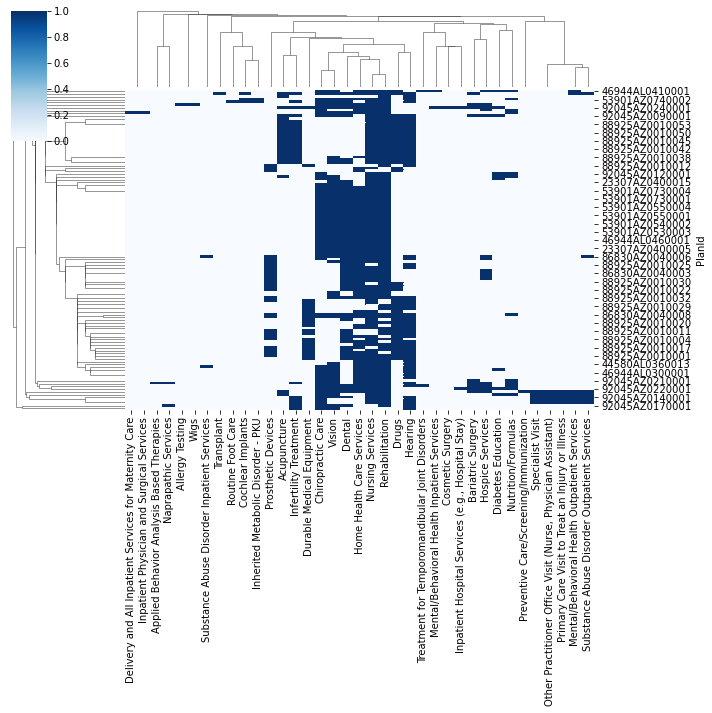

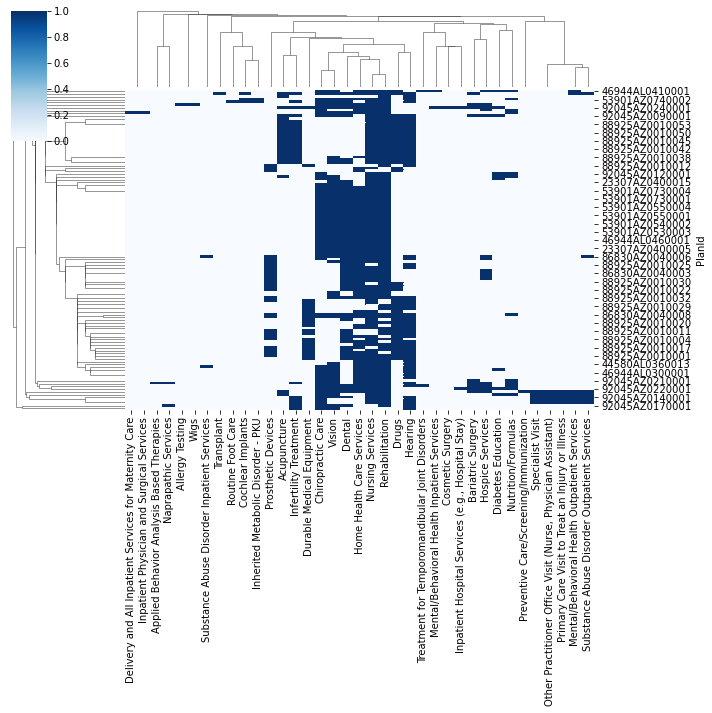

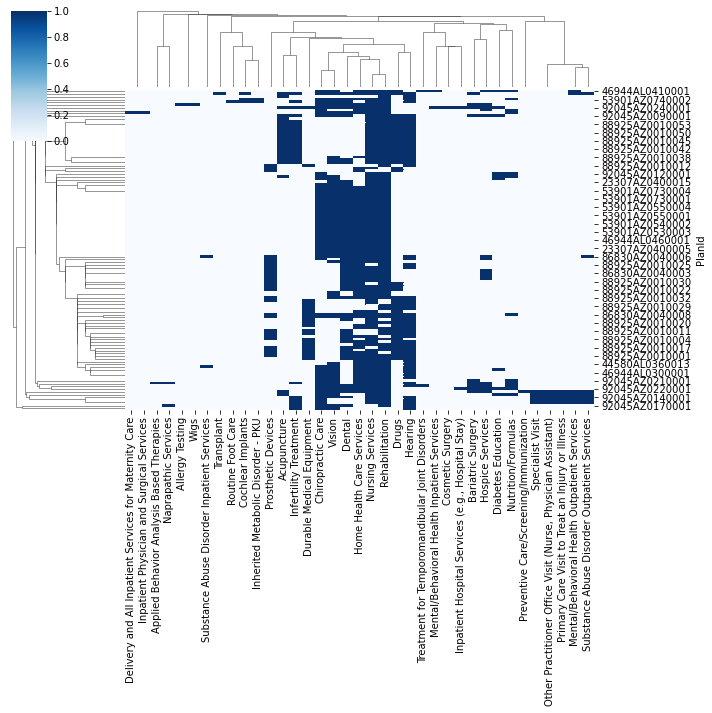

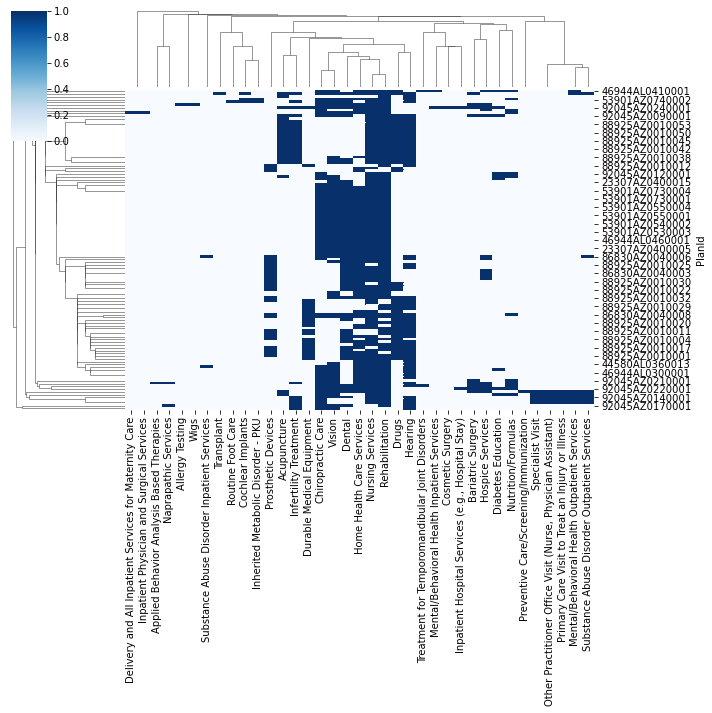

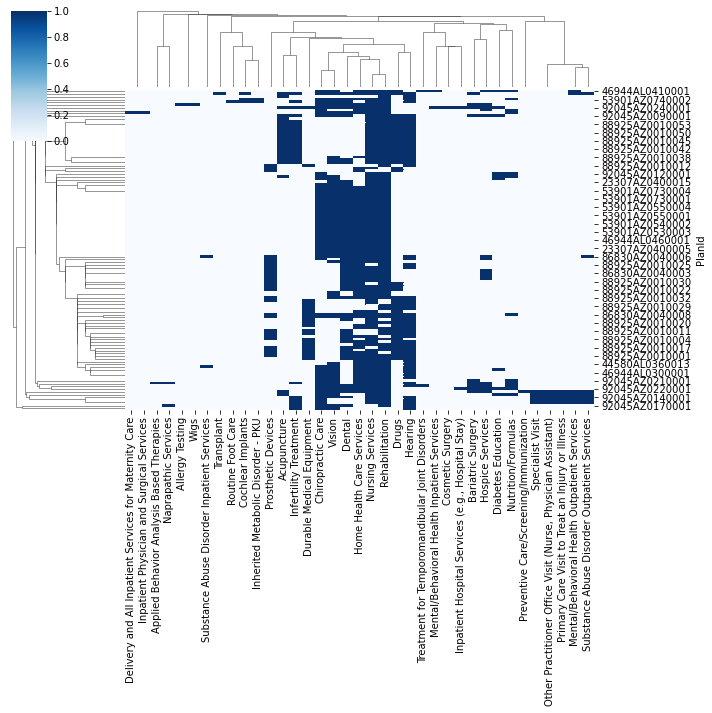

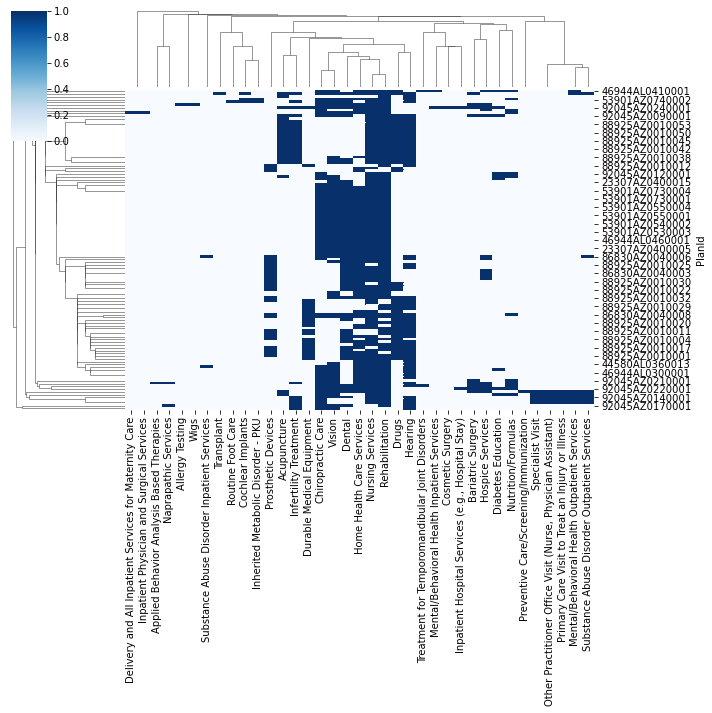

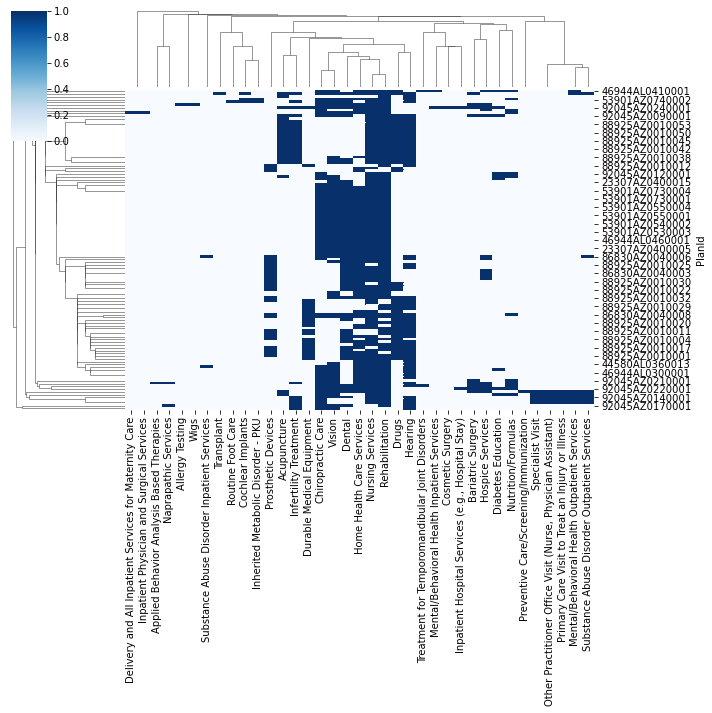

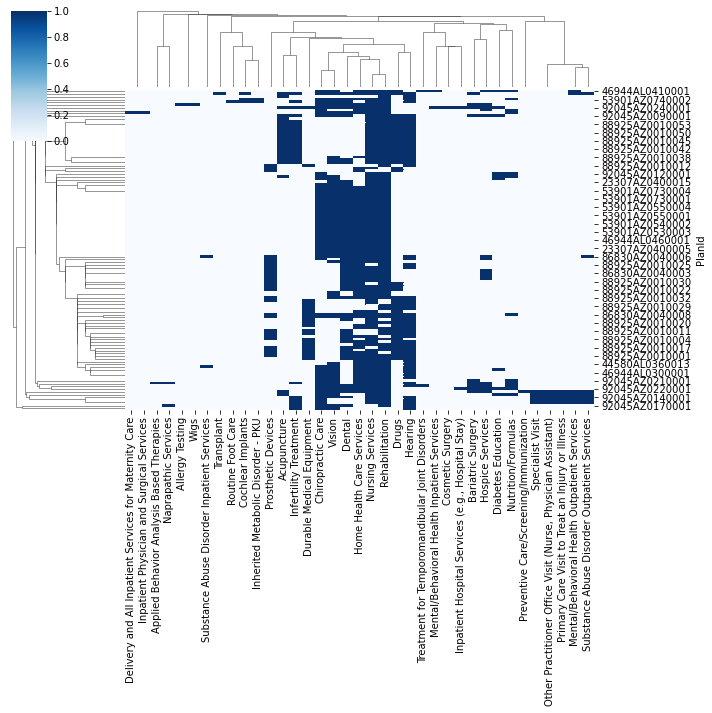

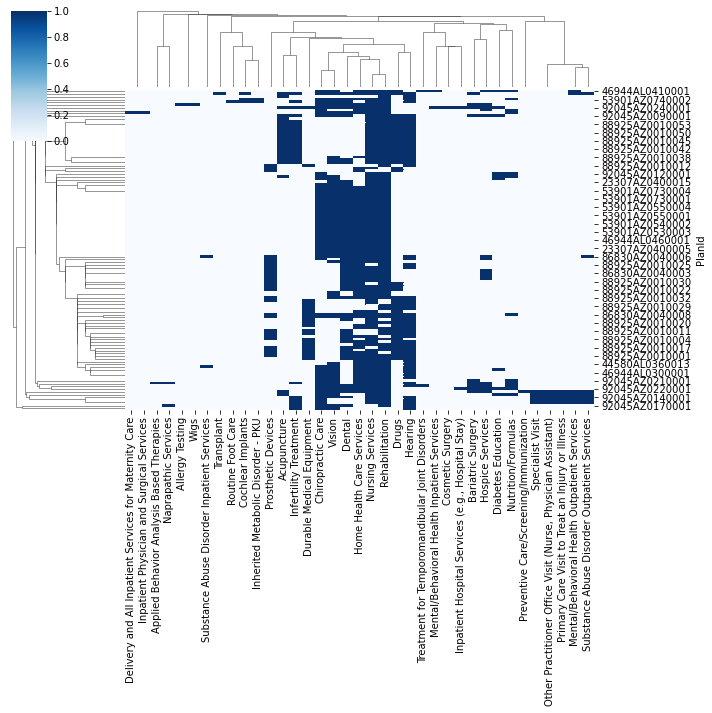

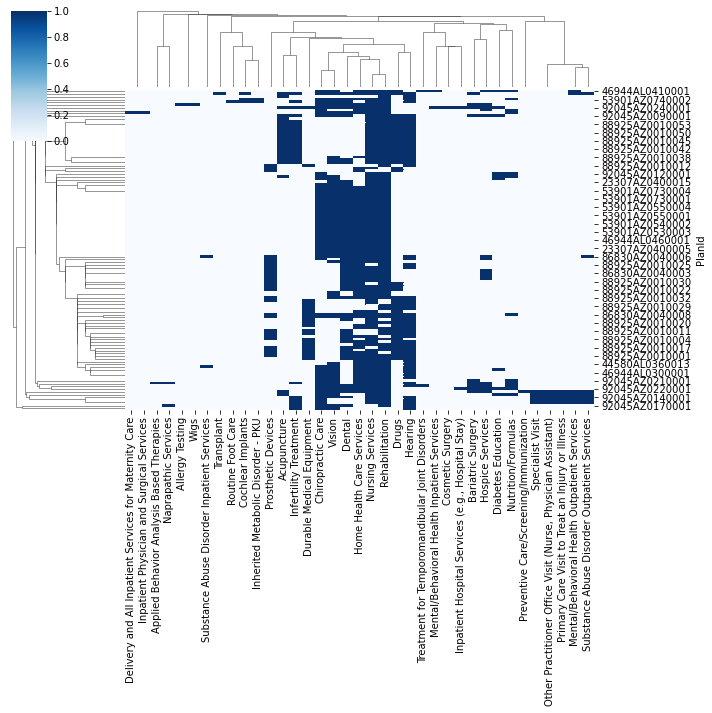

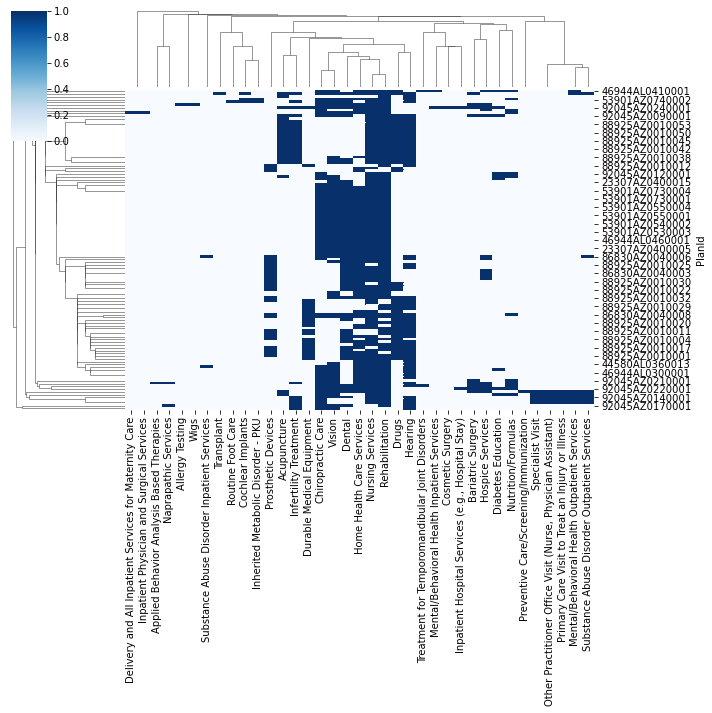

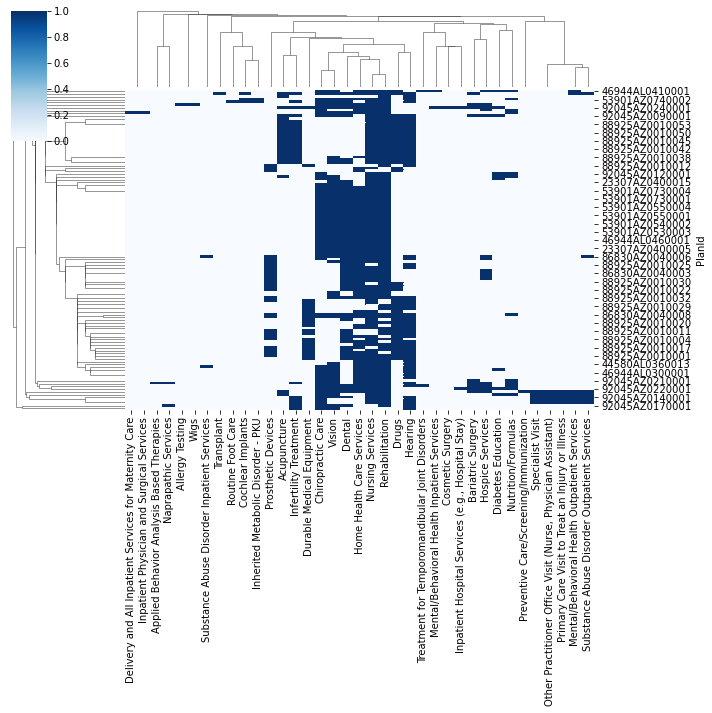

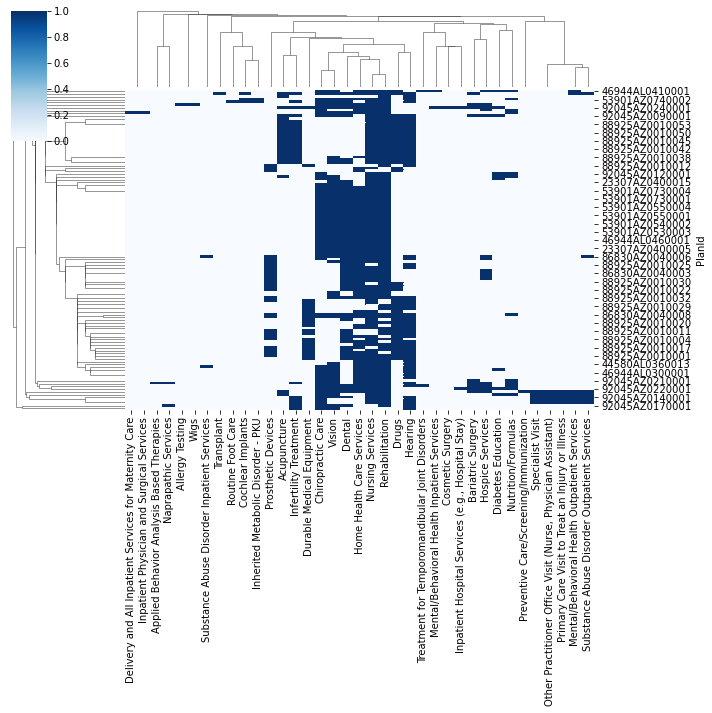

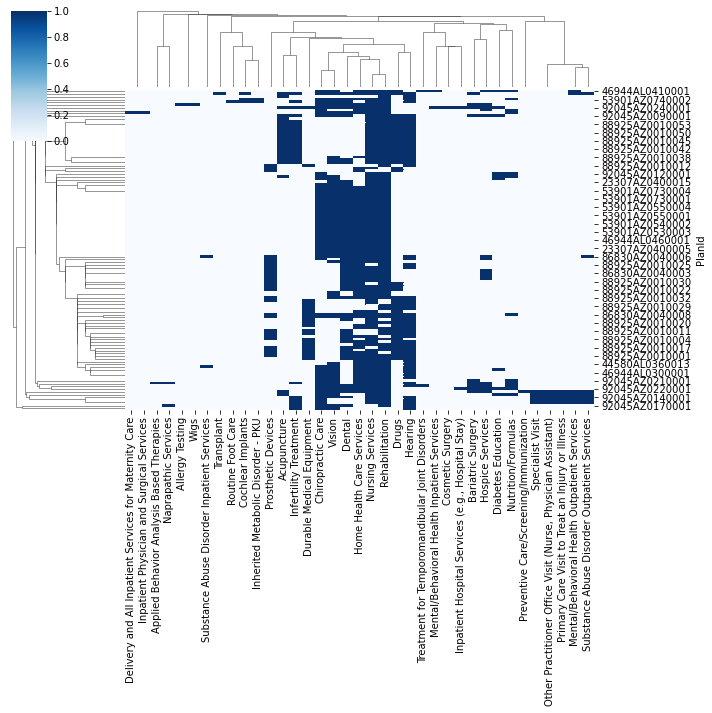

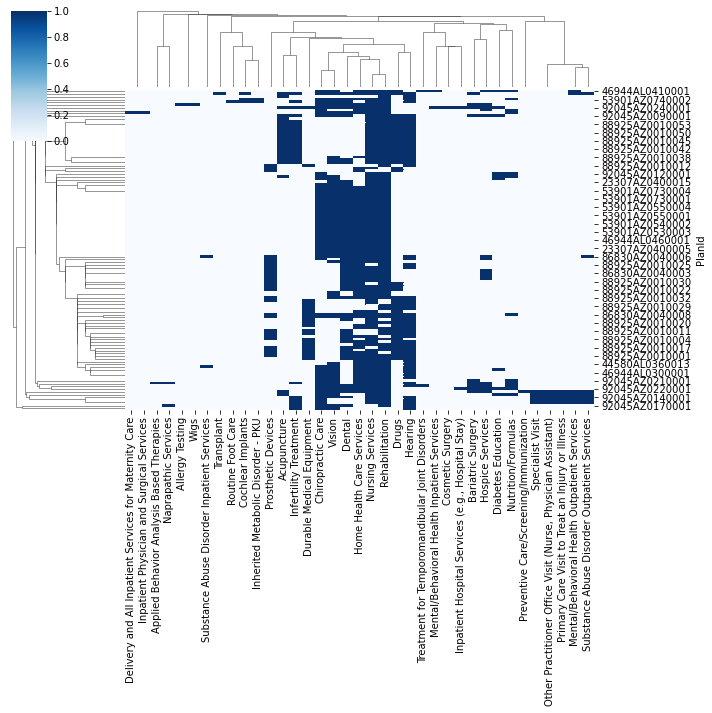

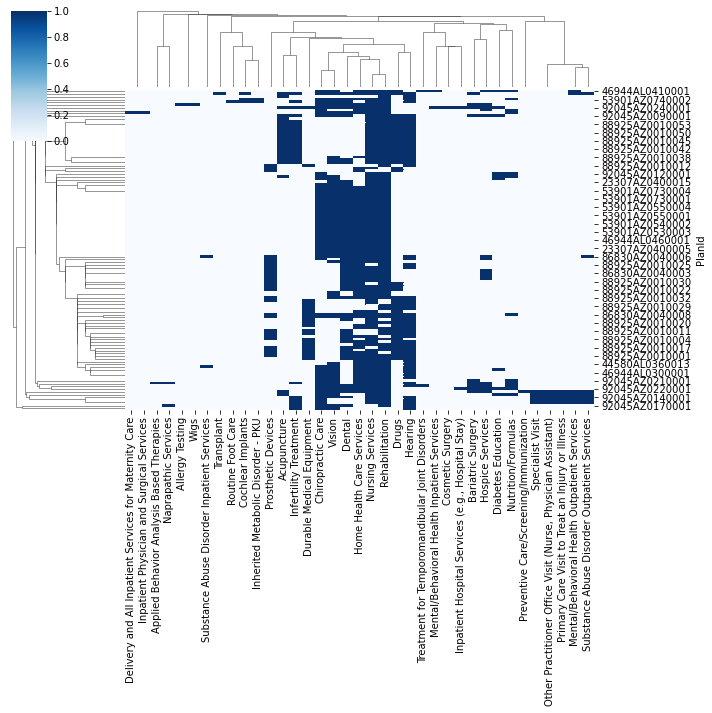

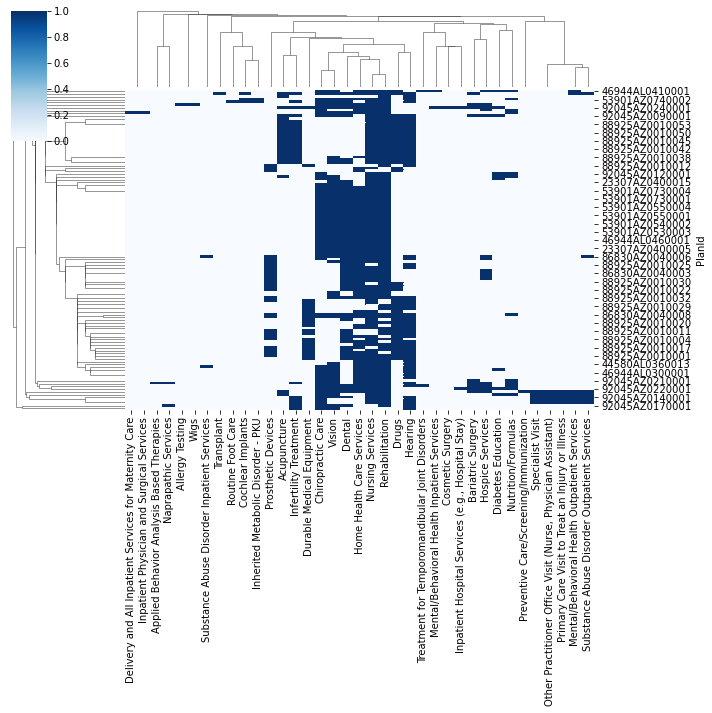

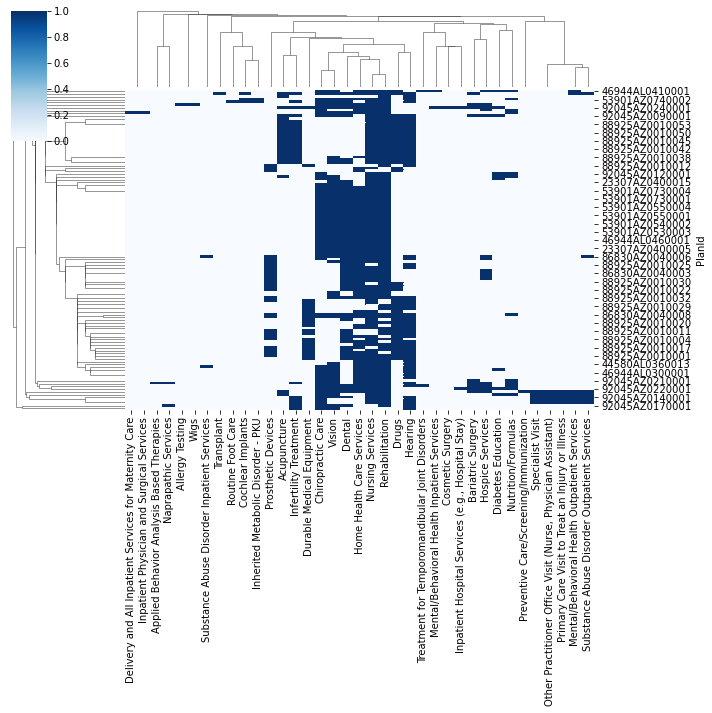

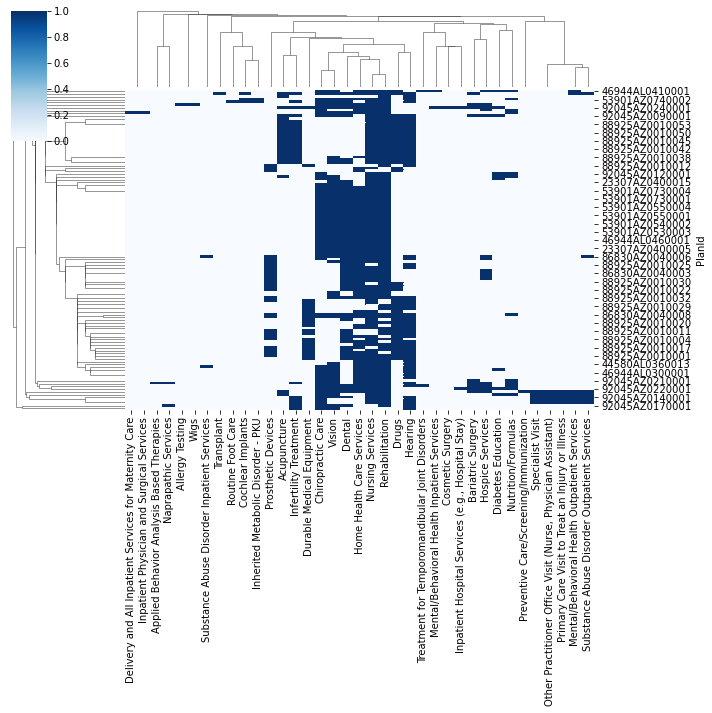

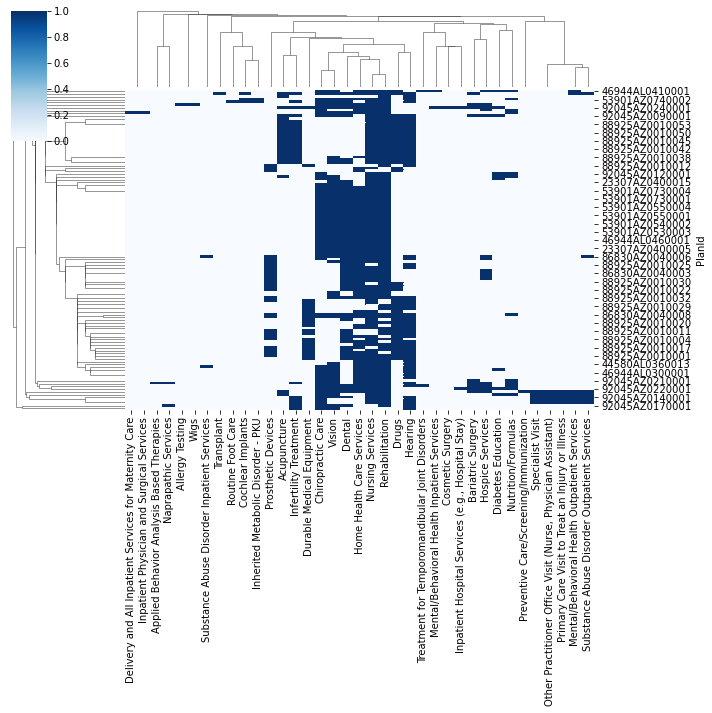

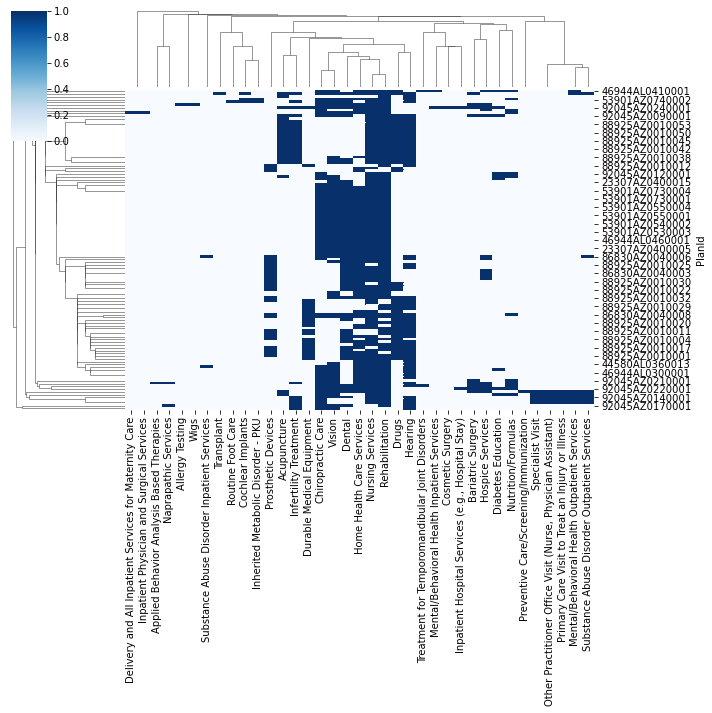

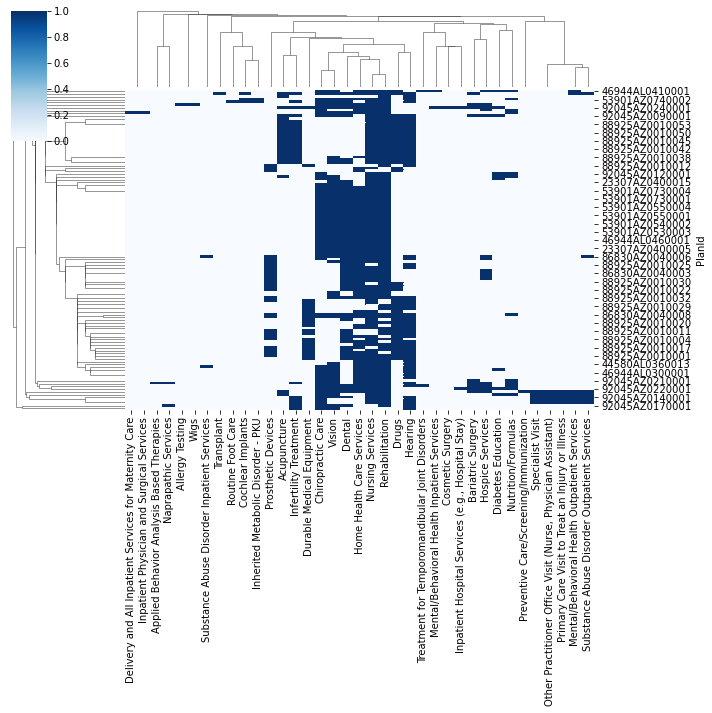

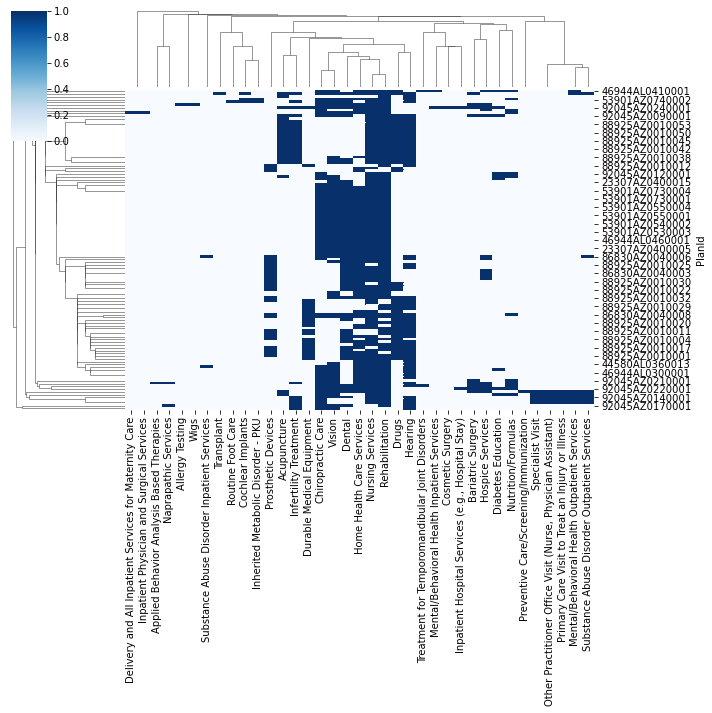

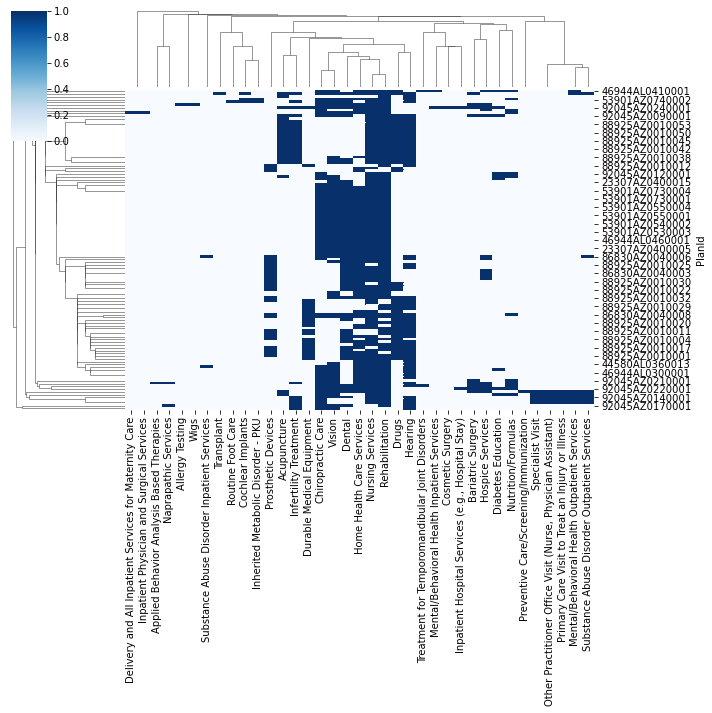

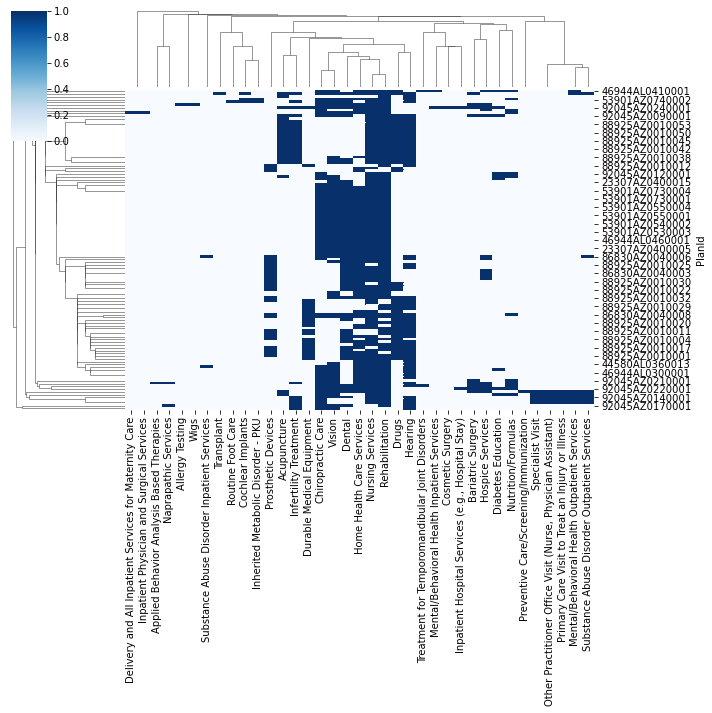

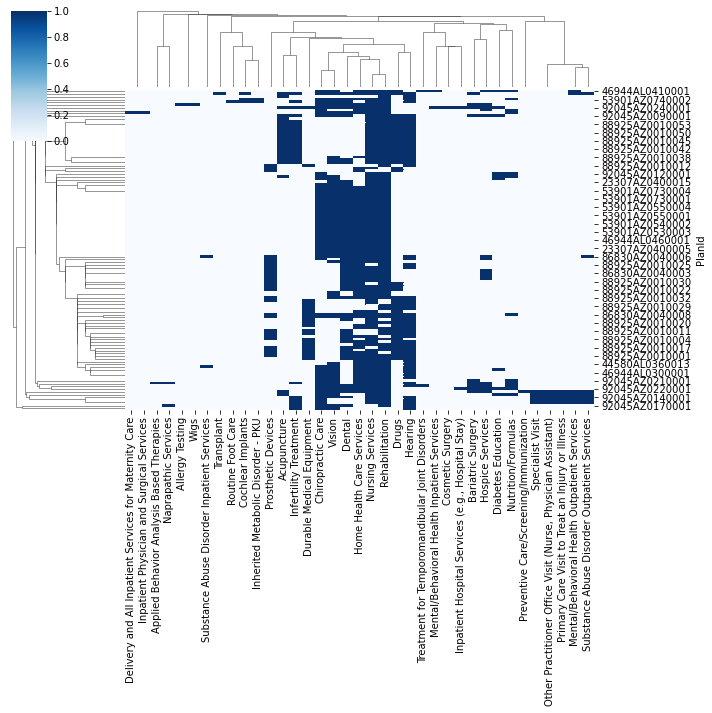

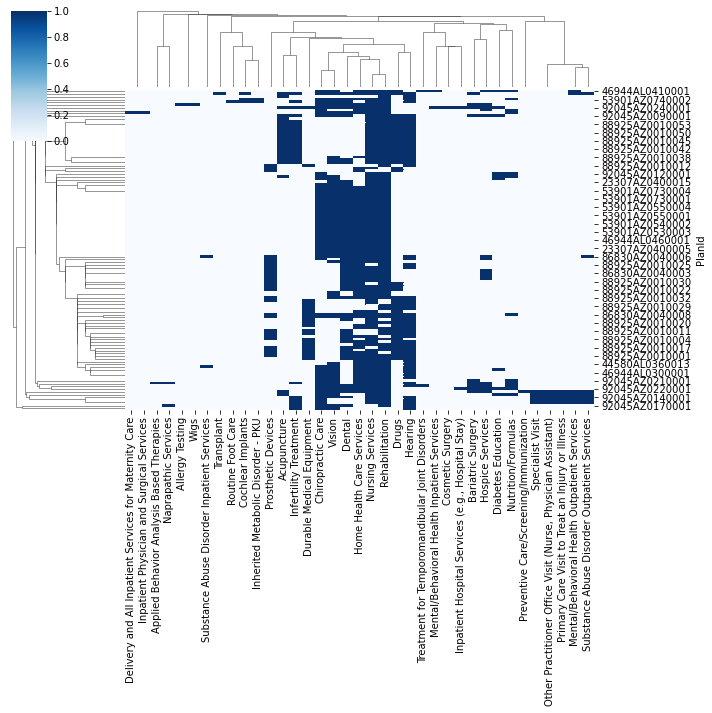

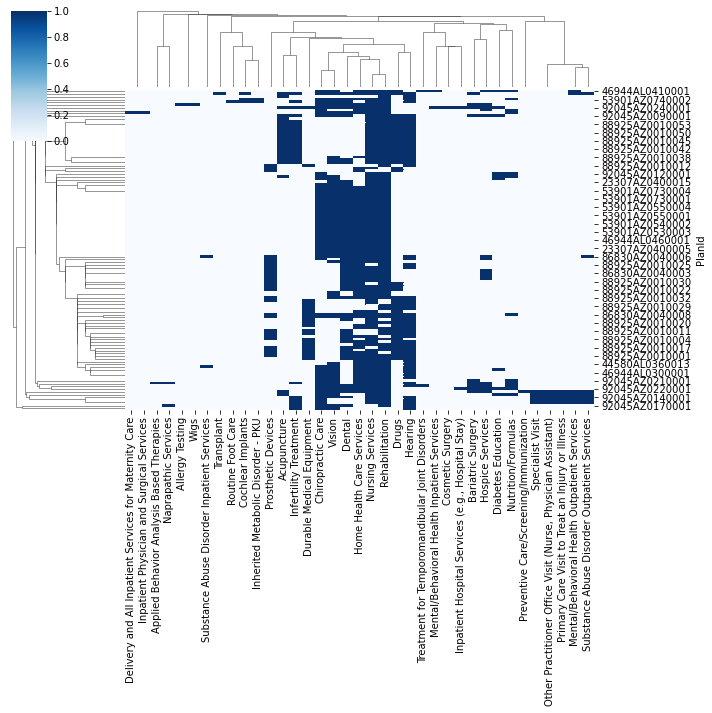

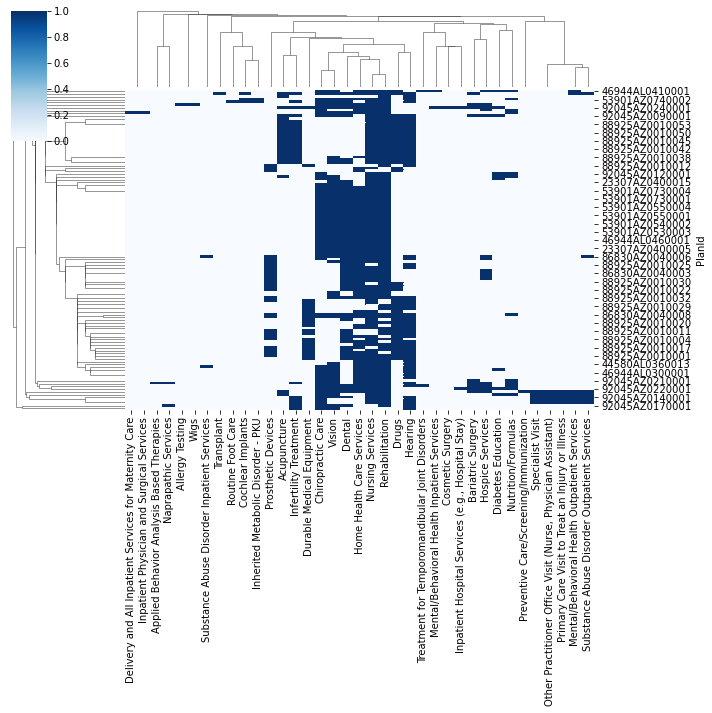

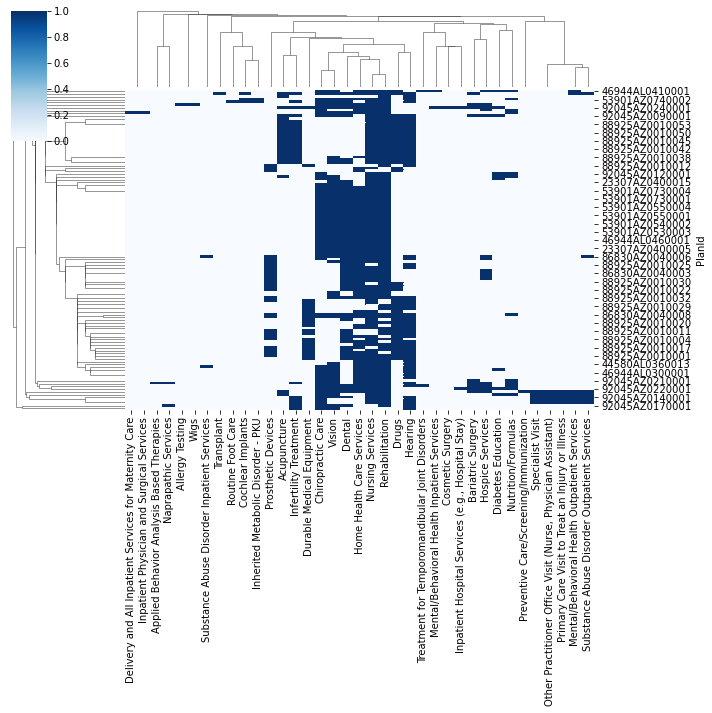

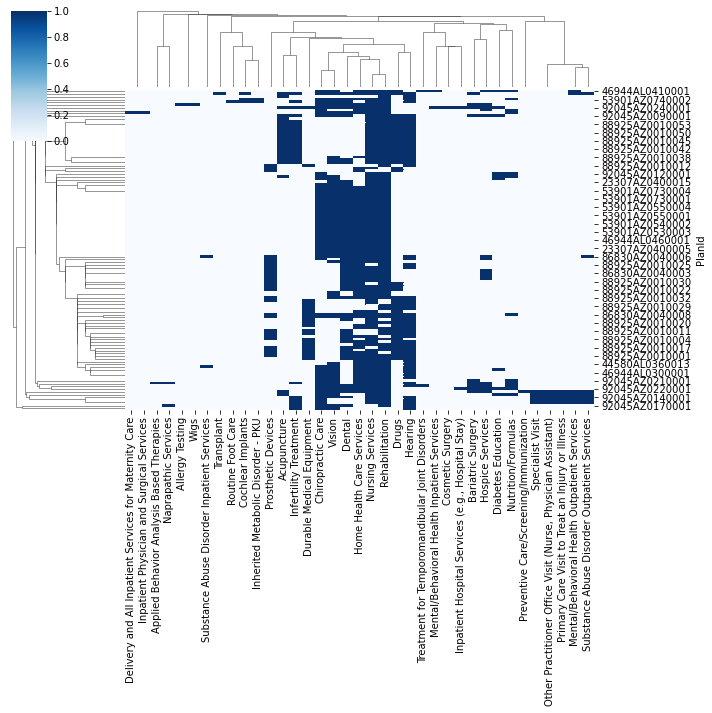

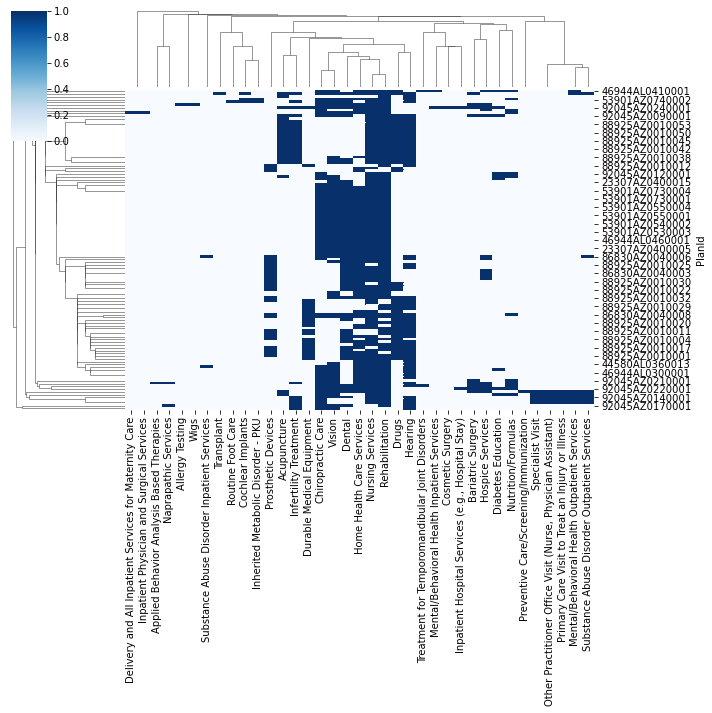

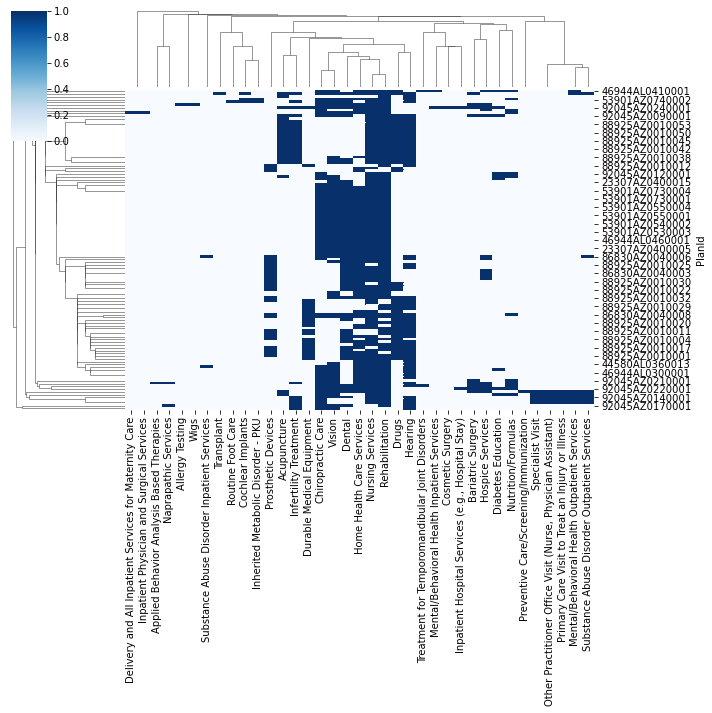

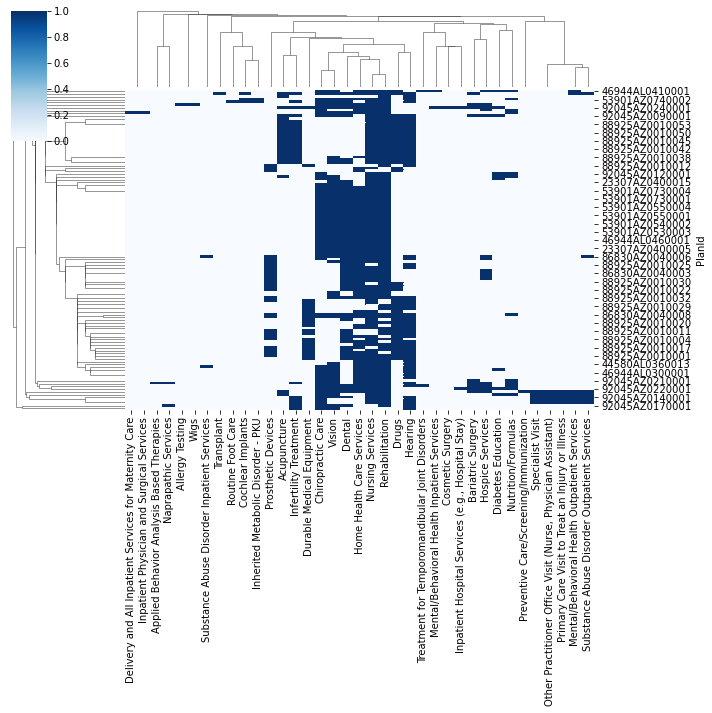

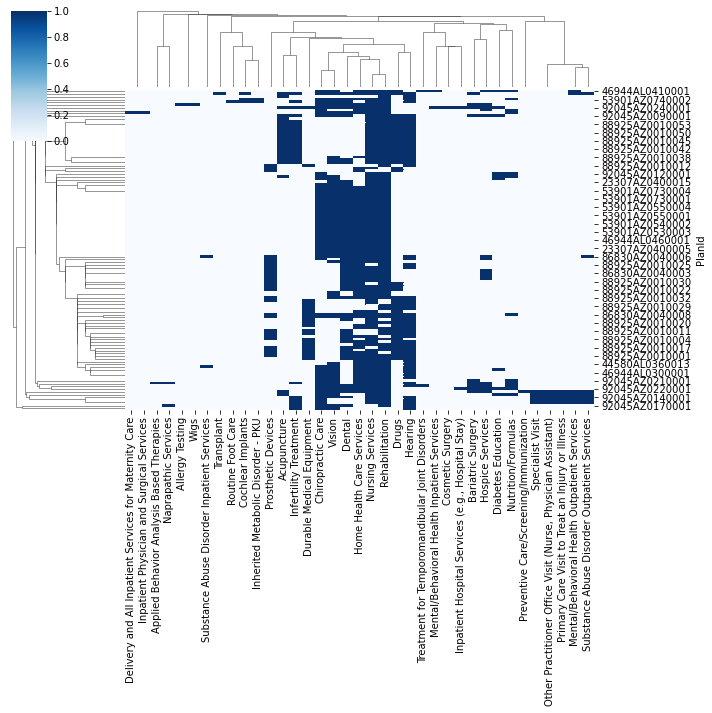

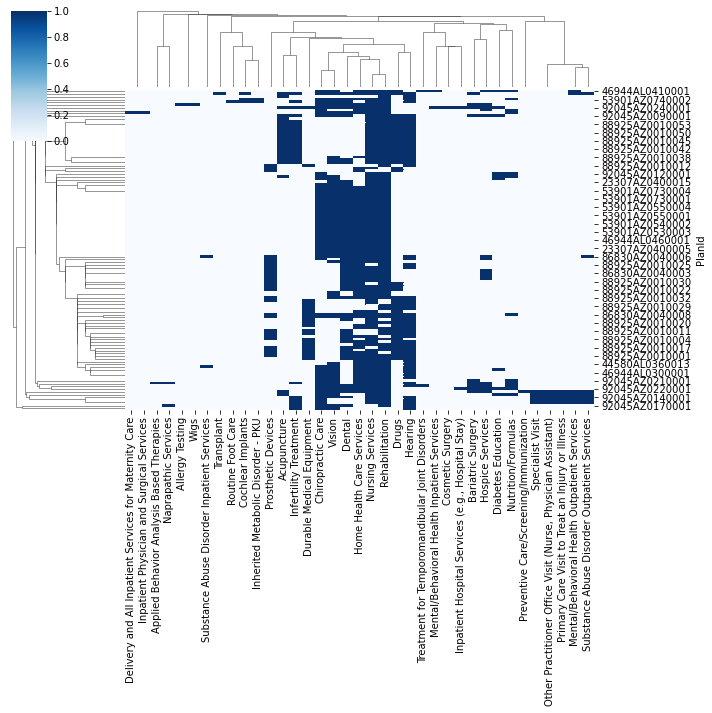

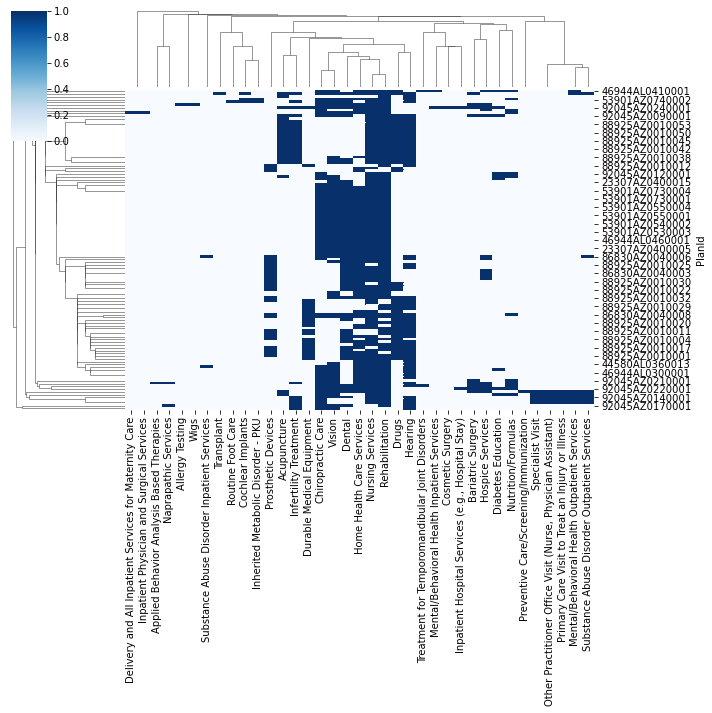

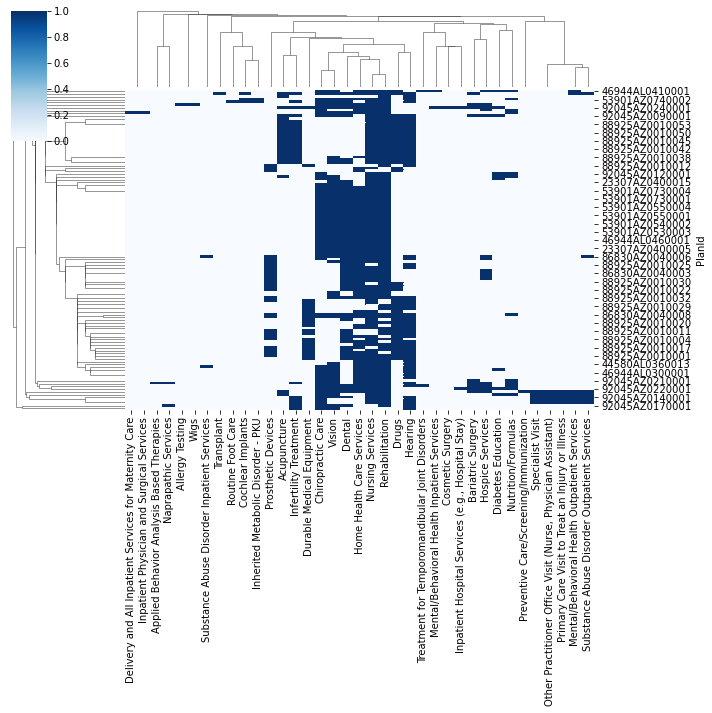

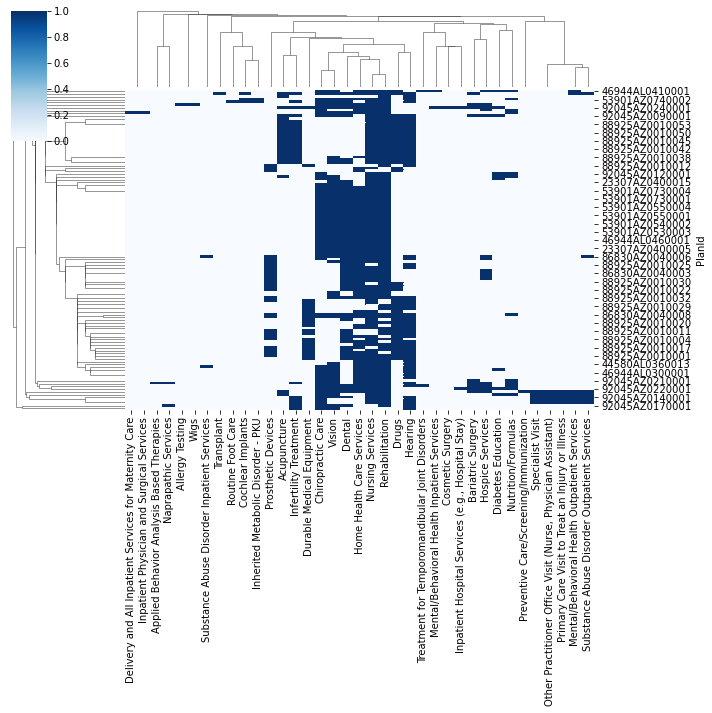

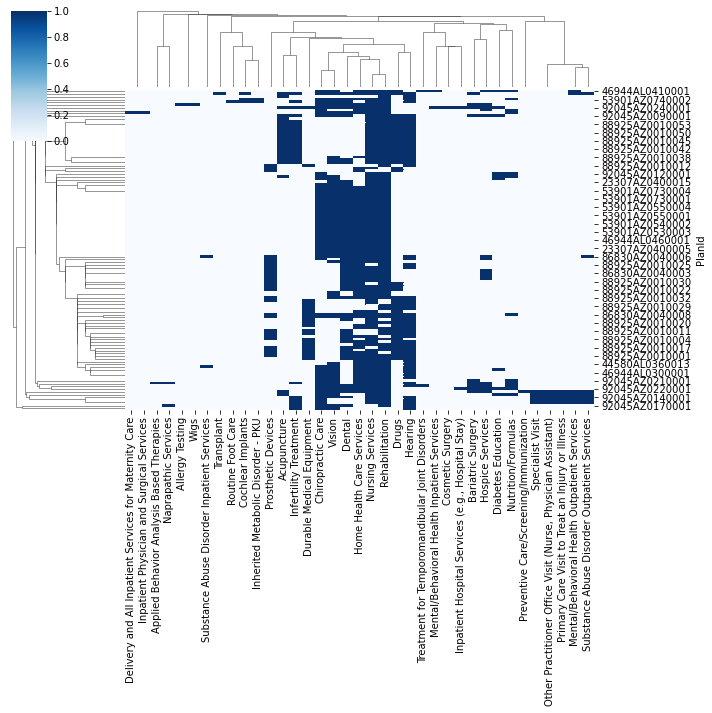

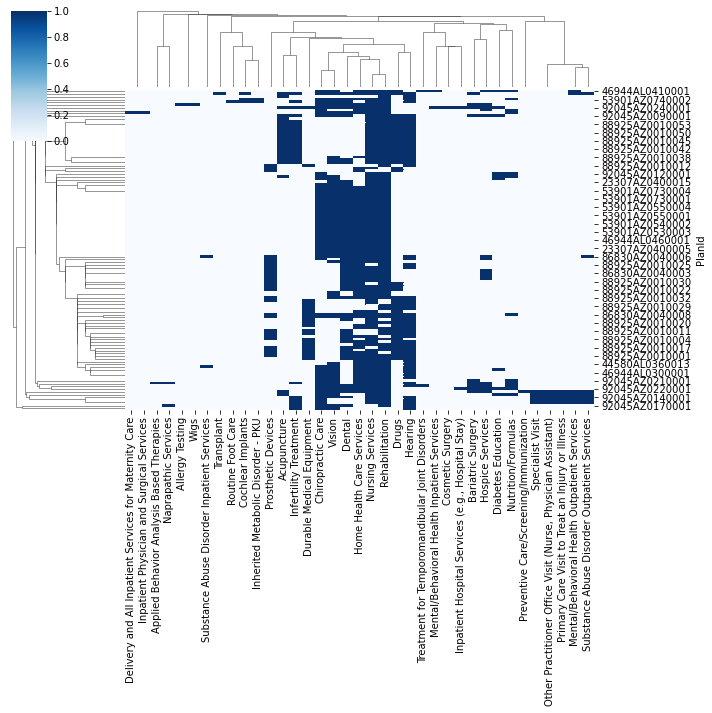

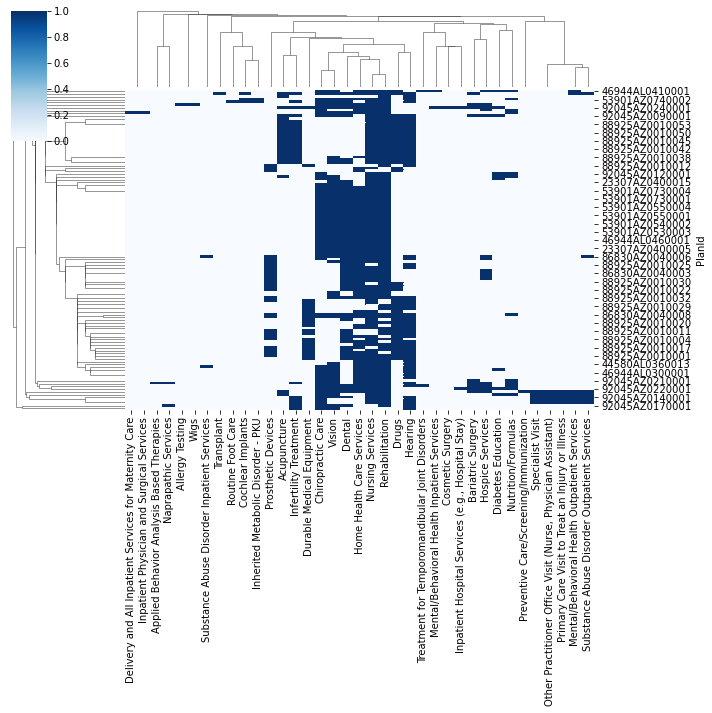

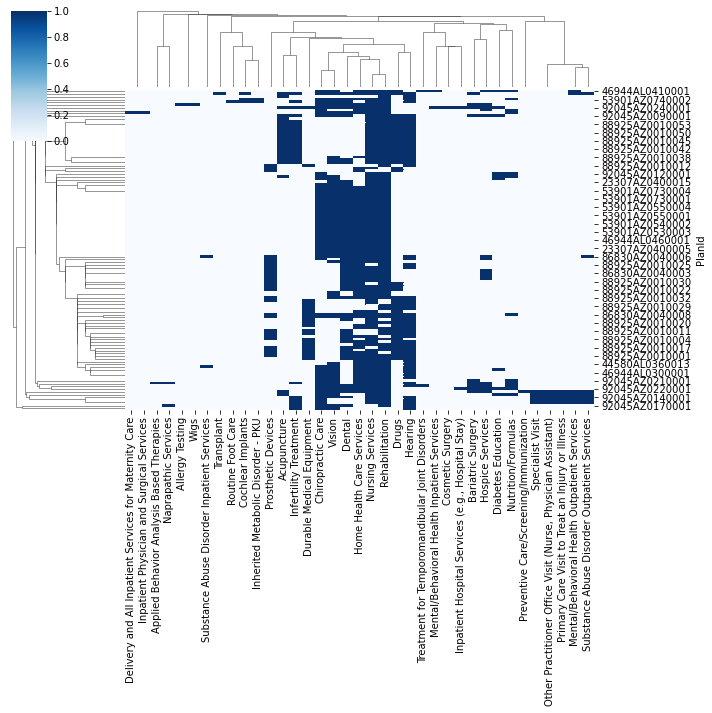

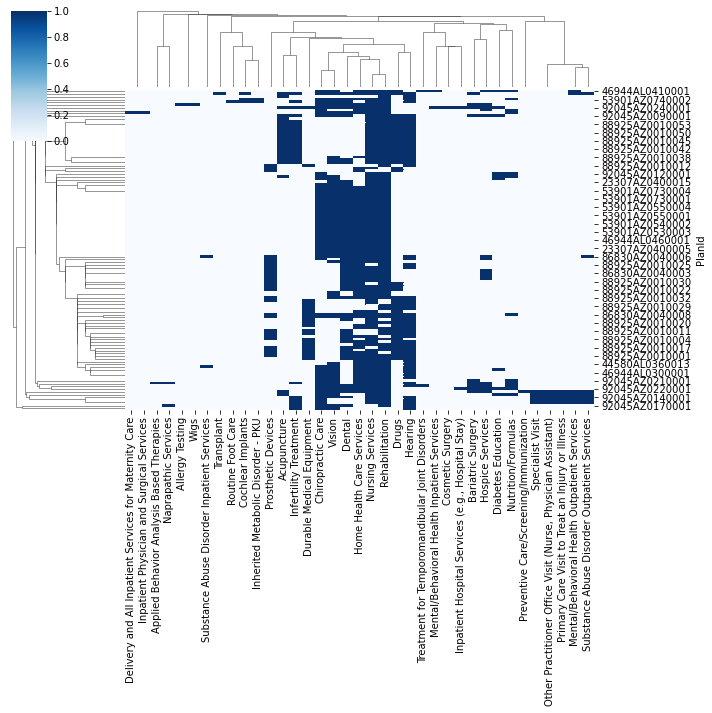

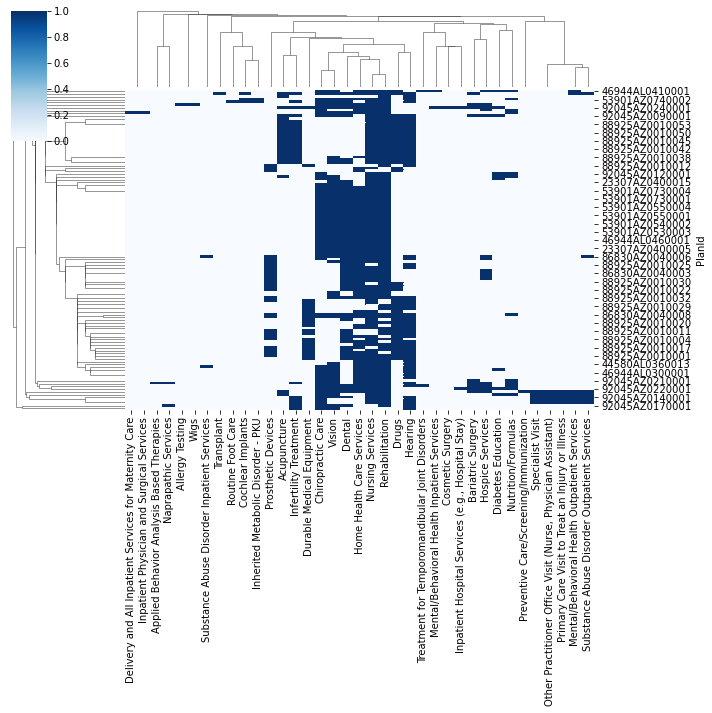

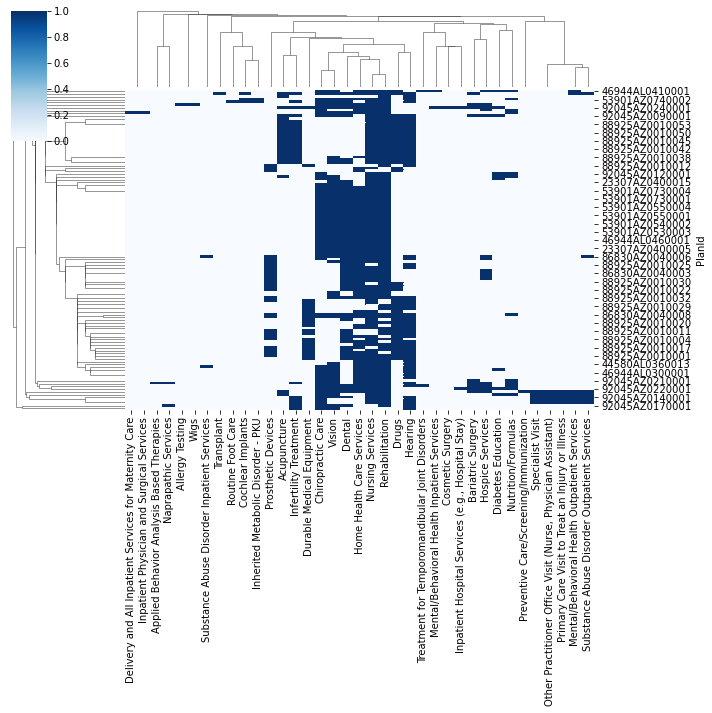

In [111]:
for i in range(len(age2)):
    sns.clustermap(age2[i], metric="jaccard", method="single", cmap="Blues")

In [ ]:
state=[]
le = preprocessing.OneHotEncoder()
le.fit(df.loc[:,"BenefitName"].to_numpy().reshape(-1,1))
n=df.loc[:,"StateCode"].unique()
for i in n:
    x=df[df.loc[:,"StateCode"]==i]
    print(i)
    x=le.transform(x.loc[:,"BenefitName"].to_numpy().reshape(-1,1))
    x=pd.DataFrame.sparse.from_spmatrix(x)
    x.loc[:,"PlanId"]=df.loc[:,"PlanId"]
    state.append(x.groupby(by=["PlanId"]).sum())

In [ ]:
state2=[]
ben_list=le.inverse_transform(np.diag(np.ones(37))).flatten().tolist()
for i in range(len(state)):
    x=(state[i]!=0)*1
    x = x.set_axis(ben_list, axis=1, inplace=False)
    state2.append(x)

C:\Users\tomis\anaconda3\lib\site-packages\seaborn\matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\tomis\anaconda3\lib\site-packages\seaborn\matrix.py:810: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self.fig = plt.figure(figsize=figsize)


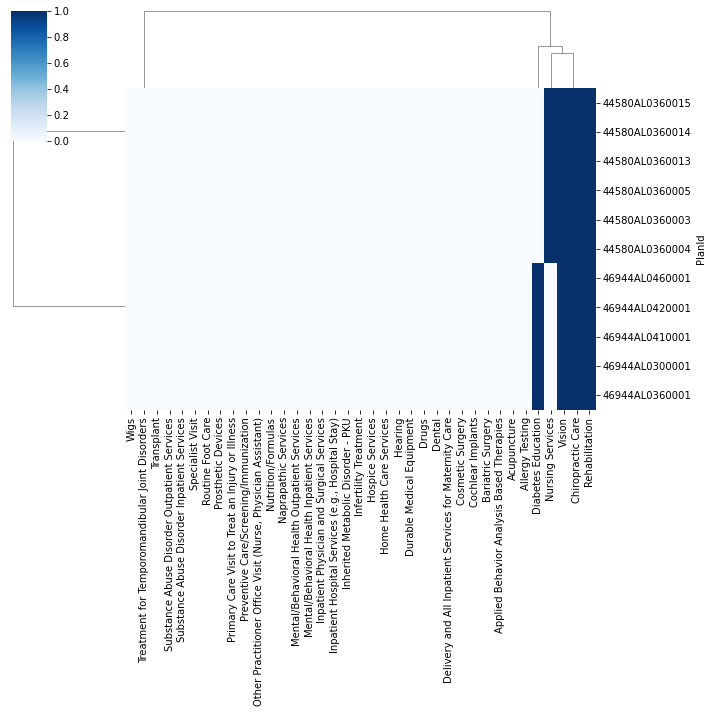

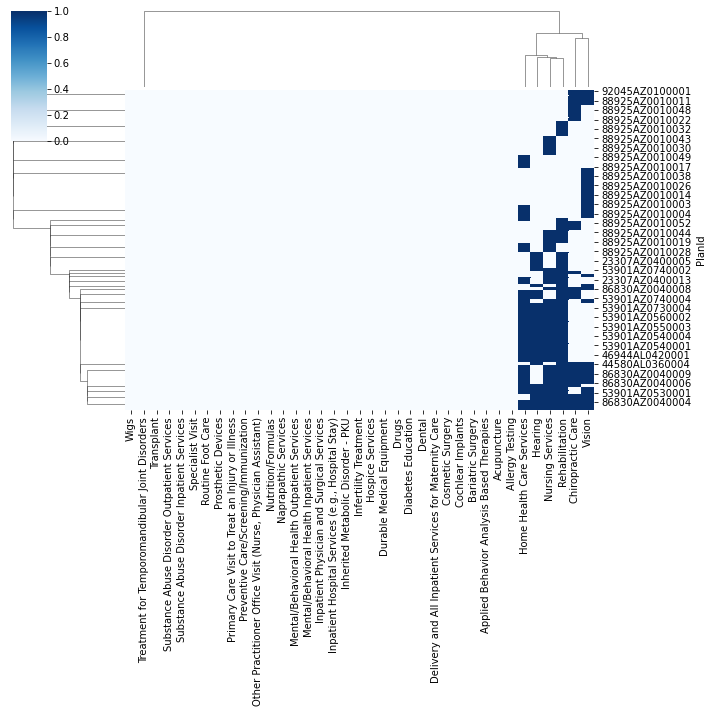

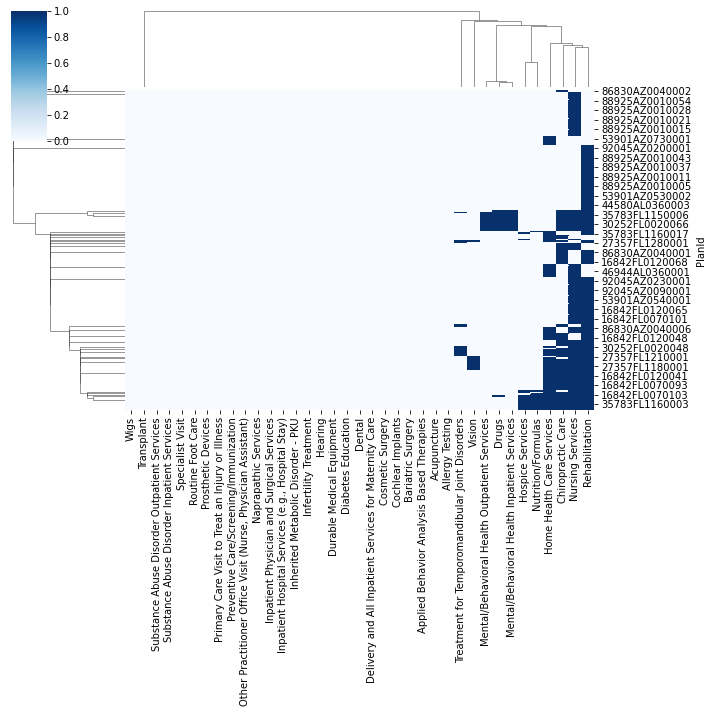

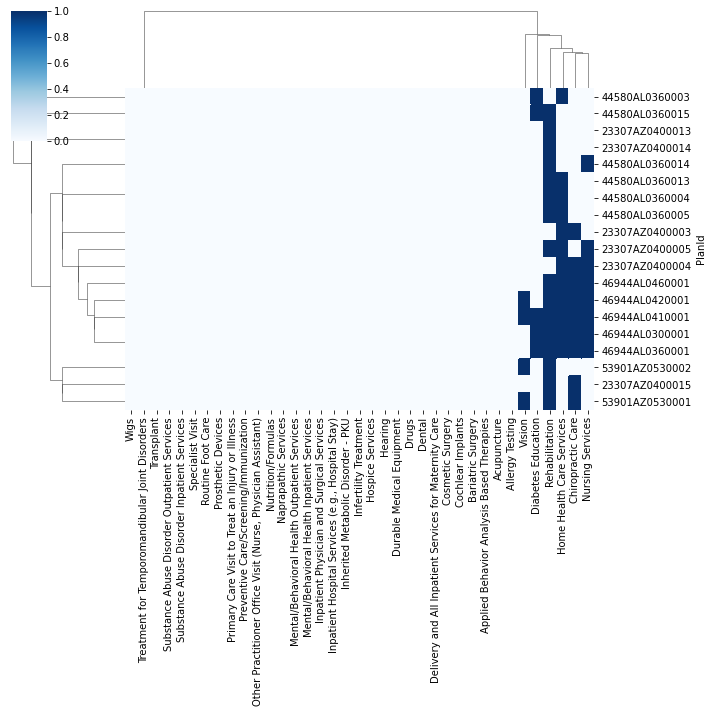

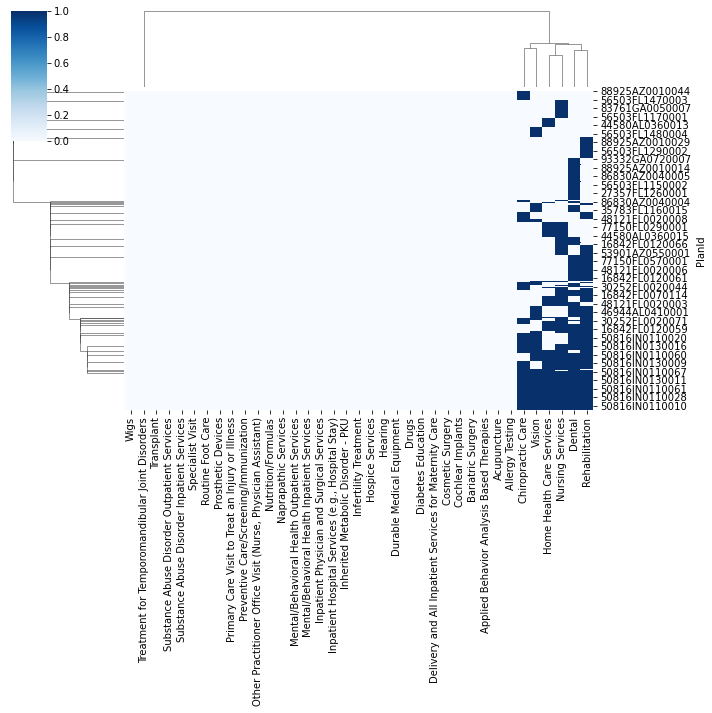

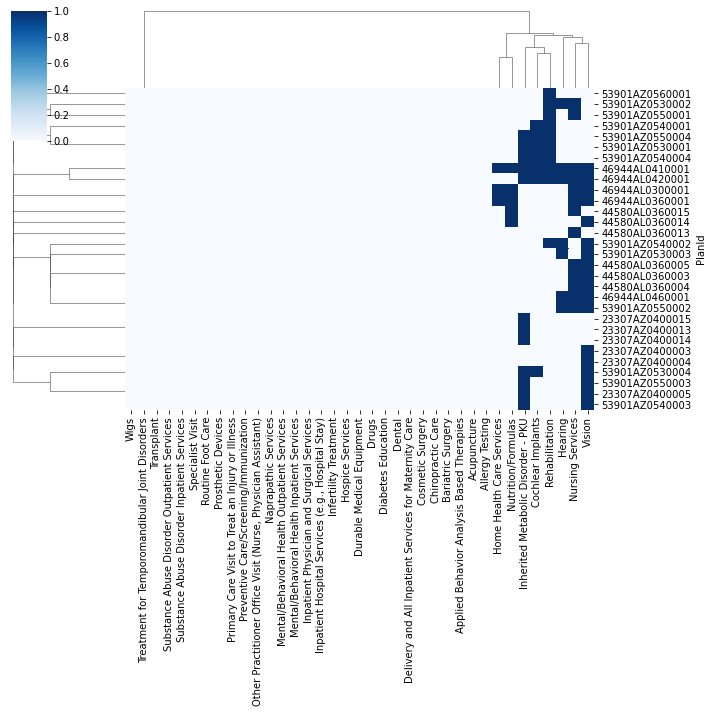

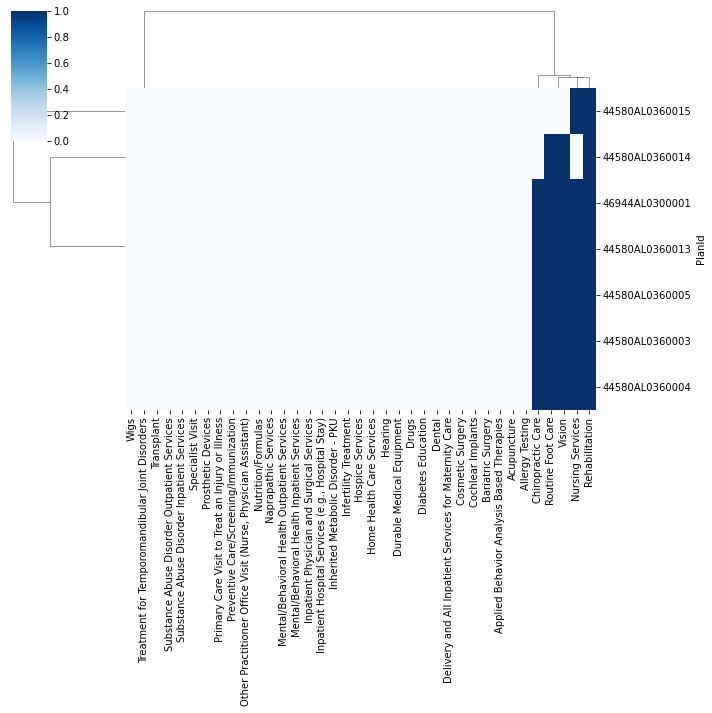

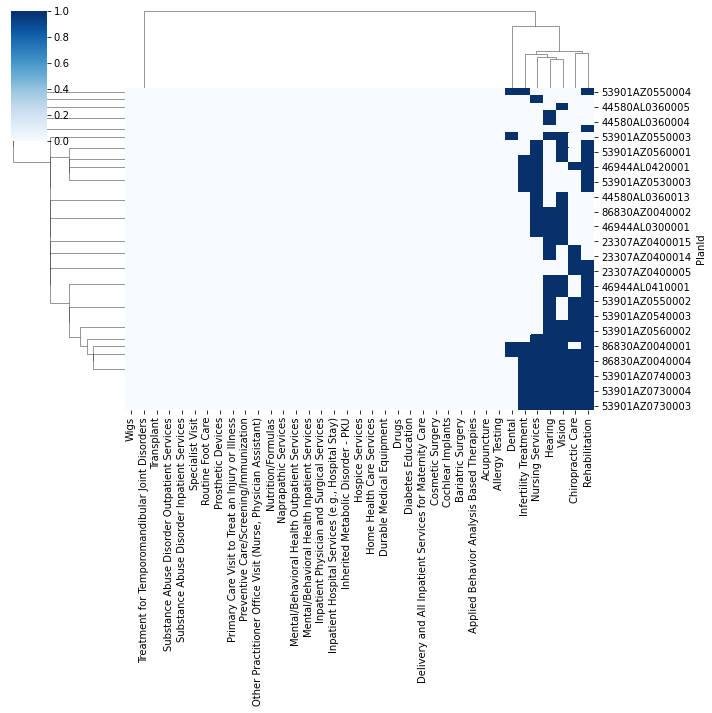

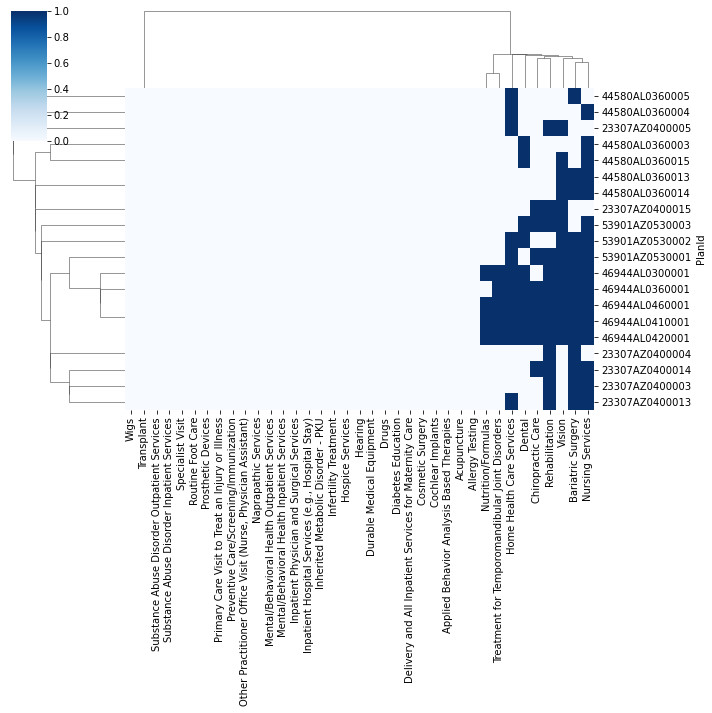

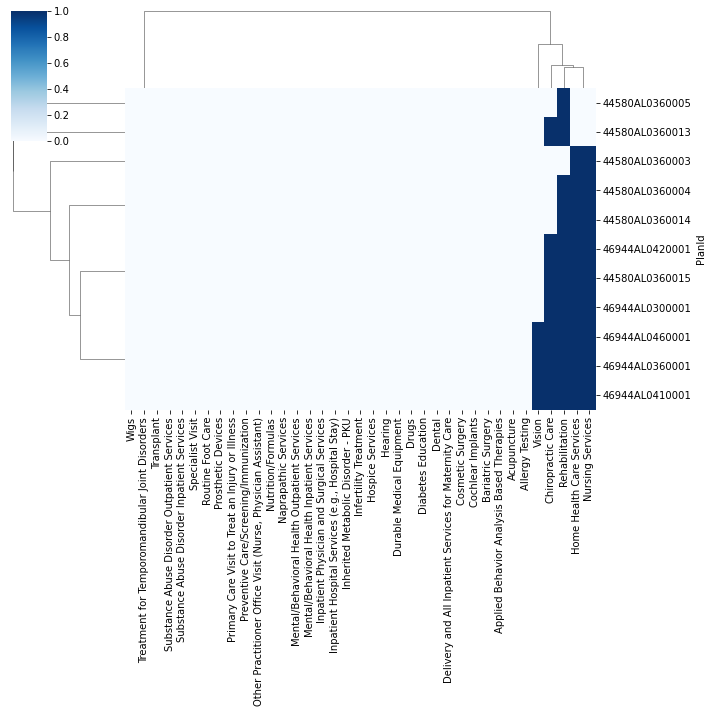

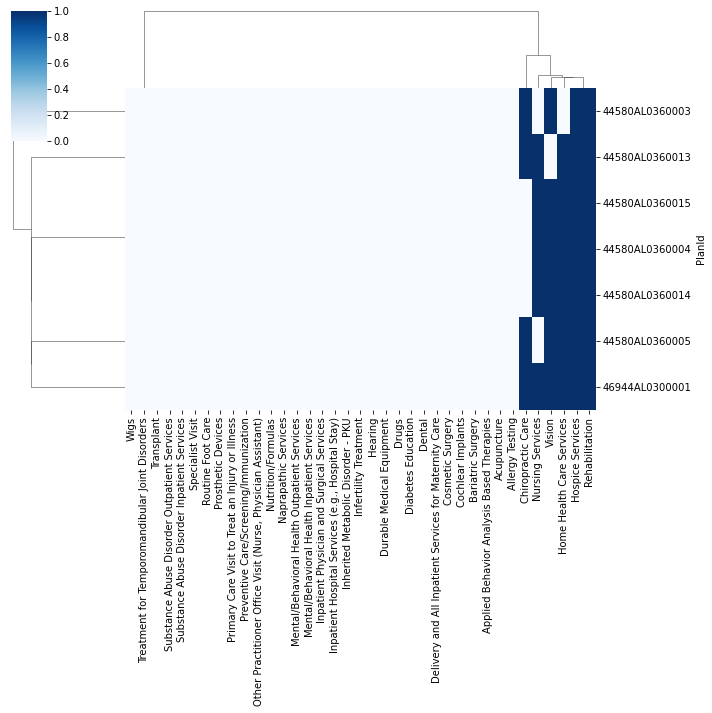

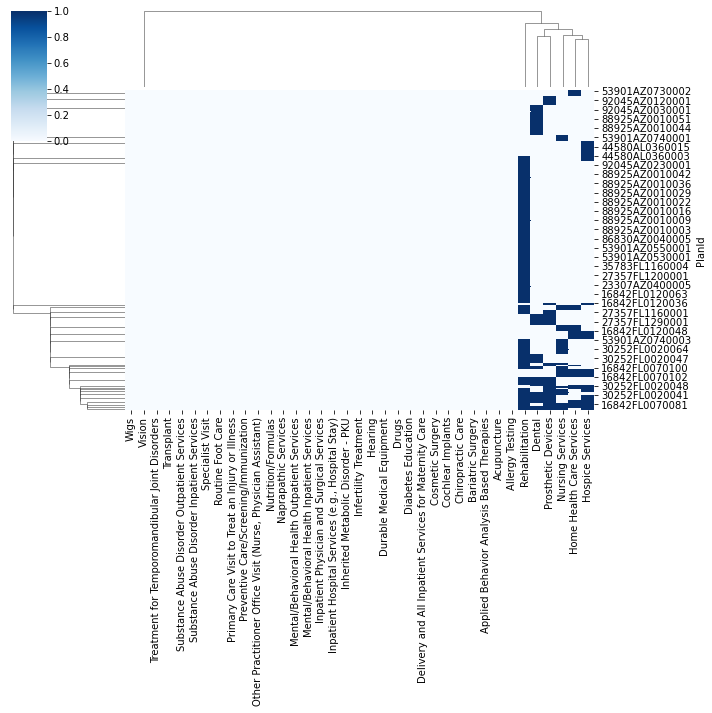

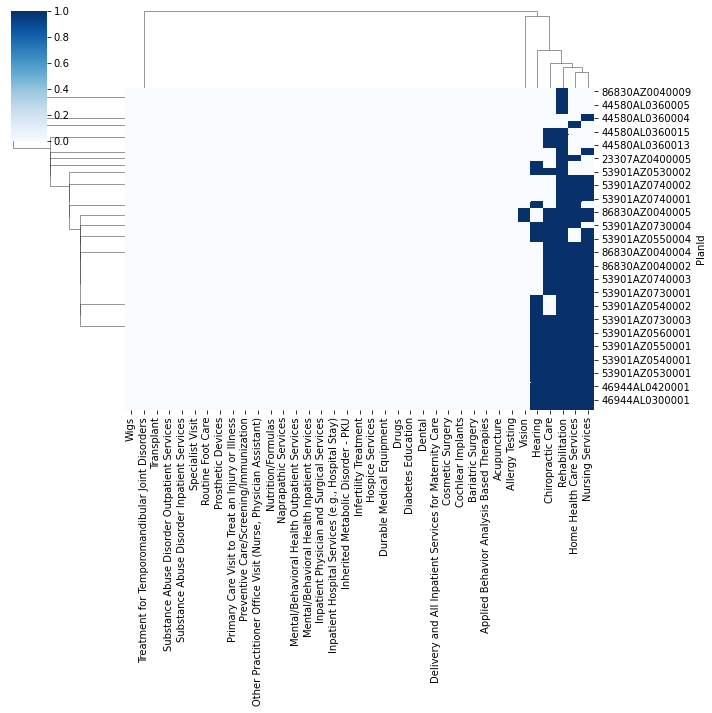

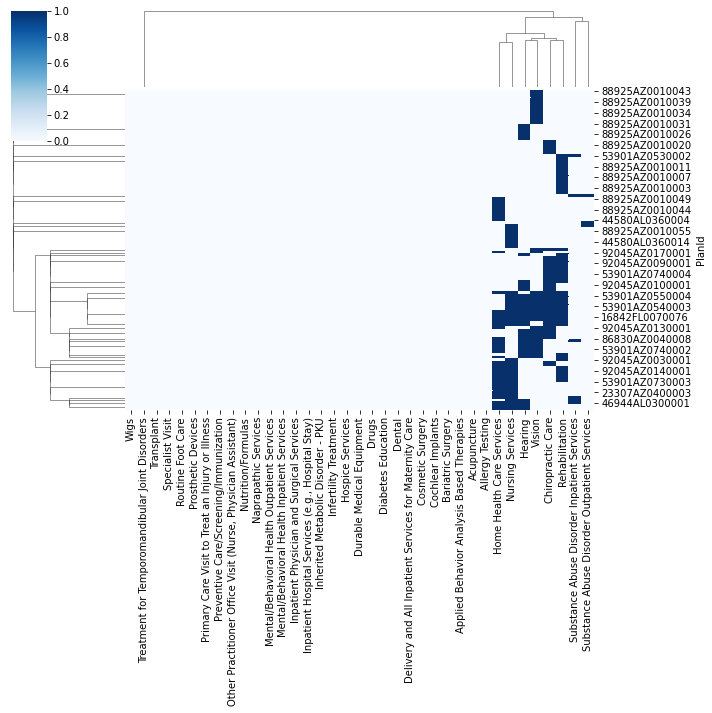

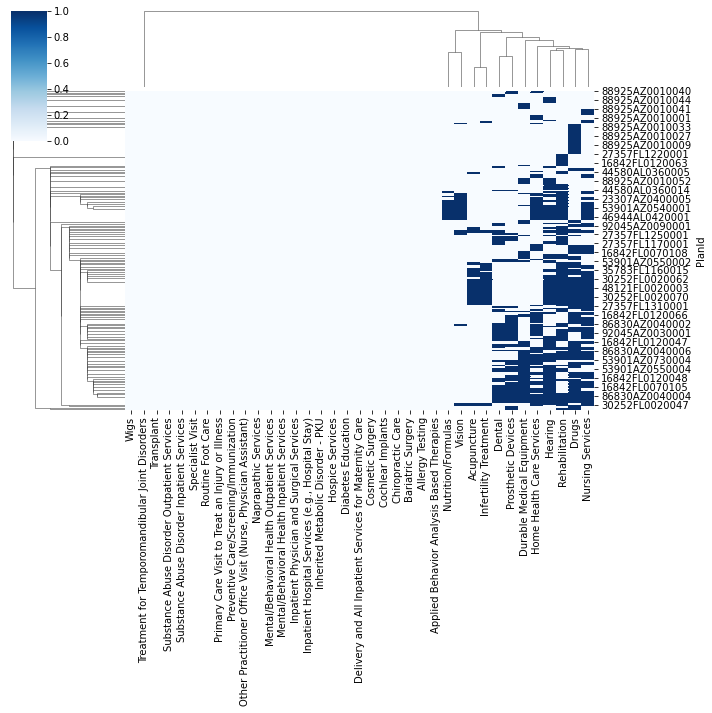

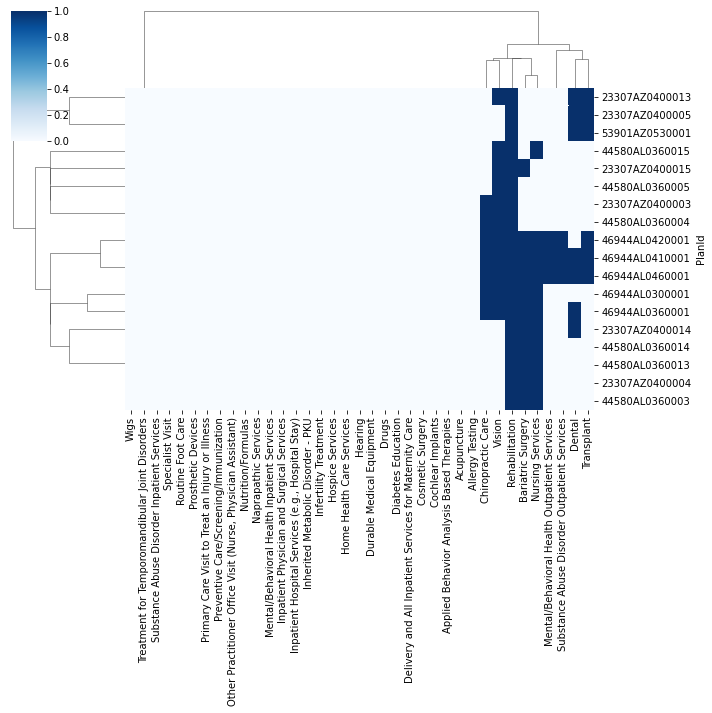

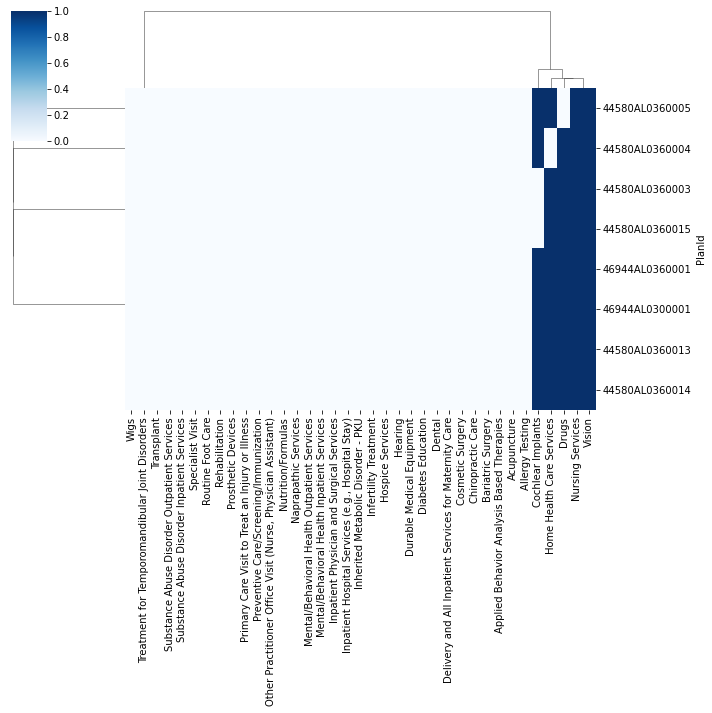

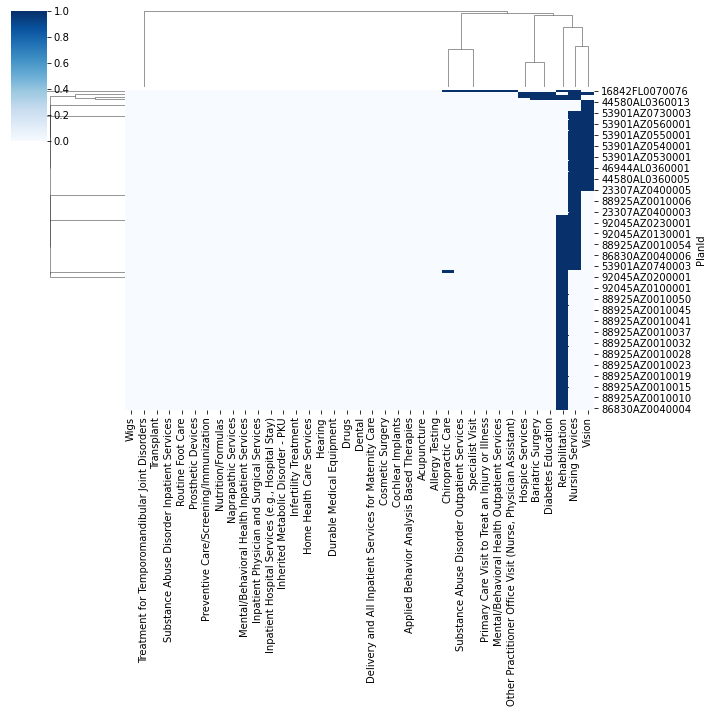

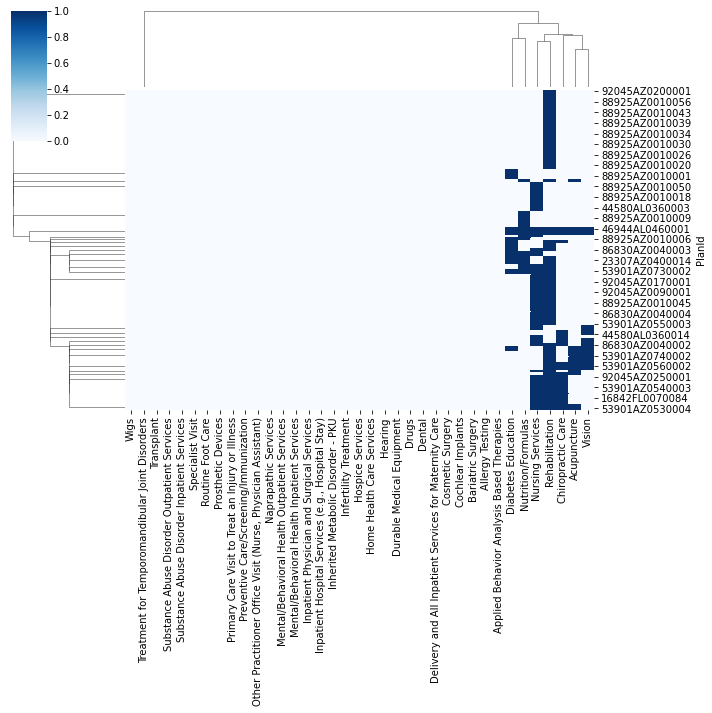

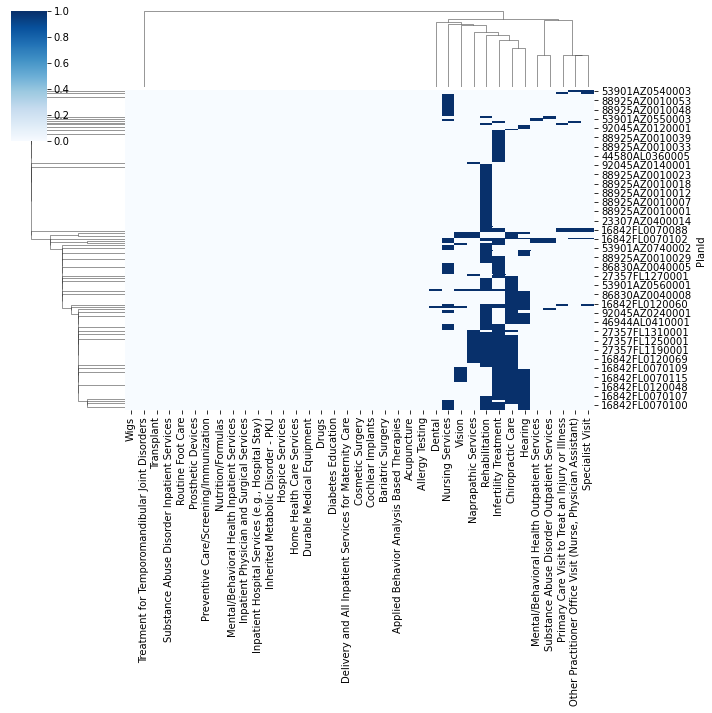

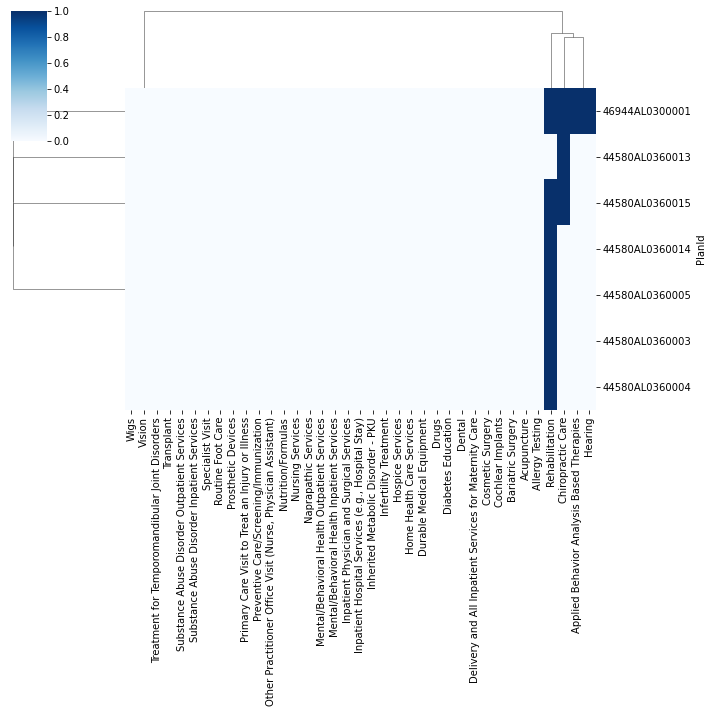

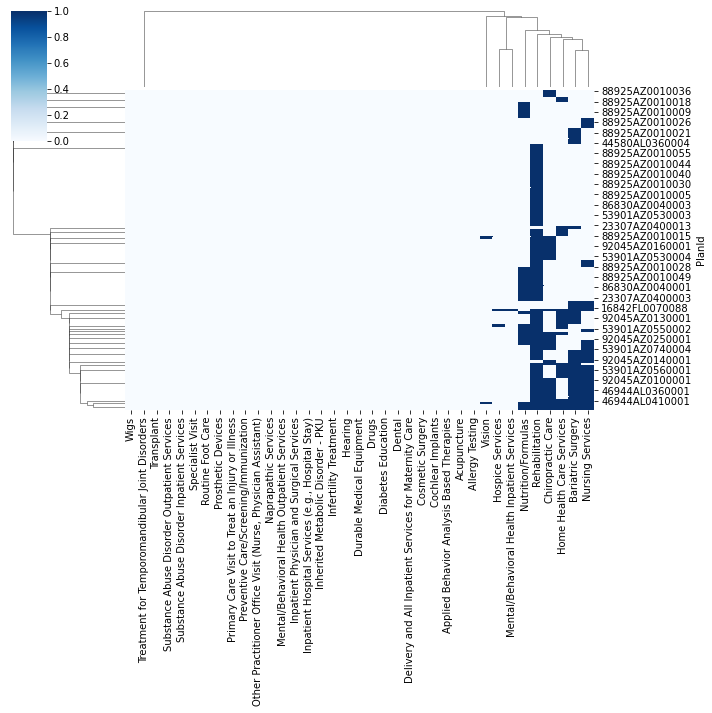

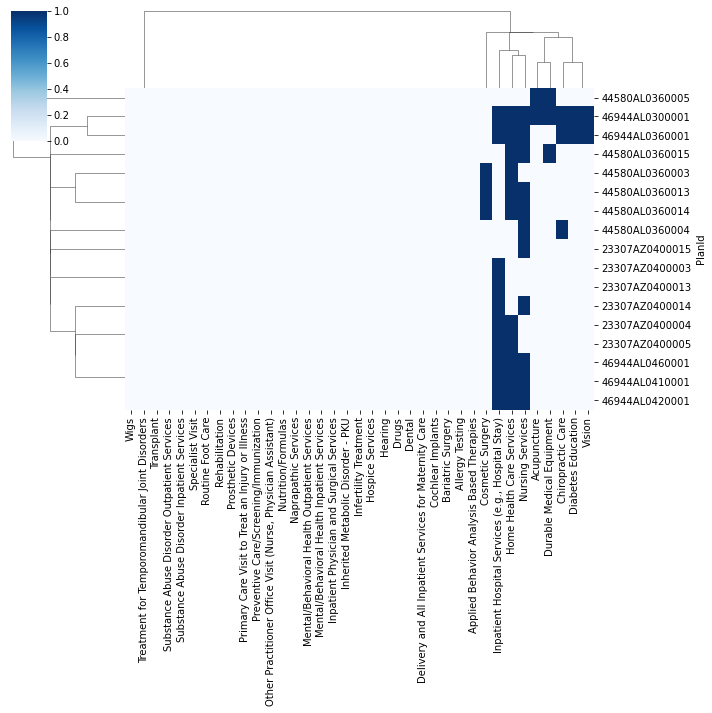

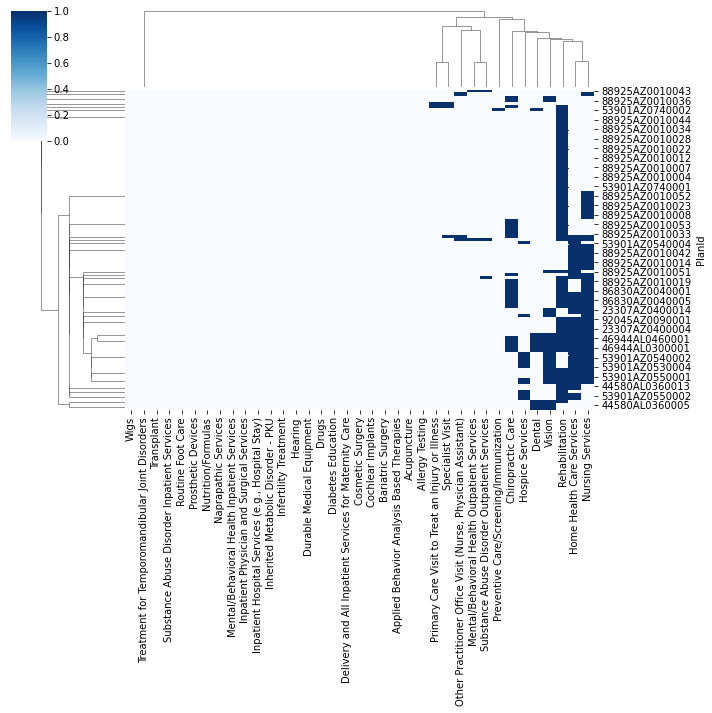

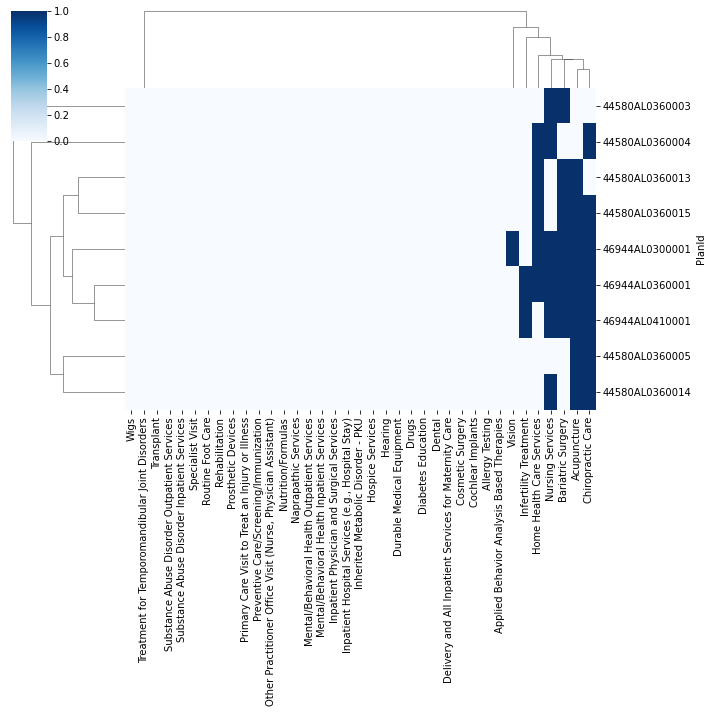

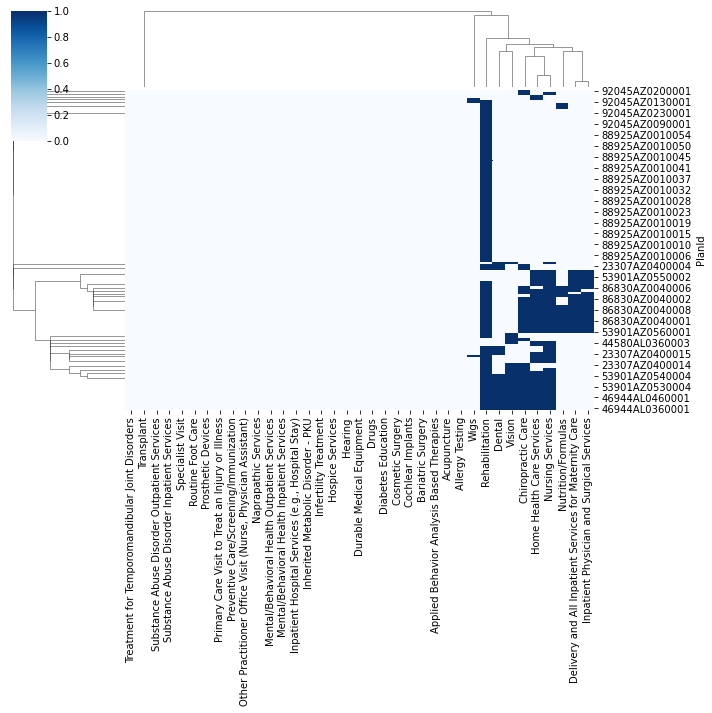

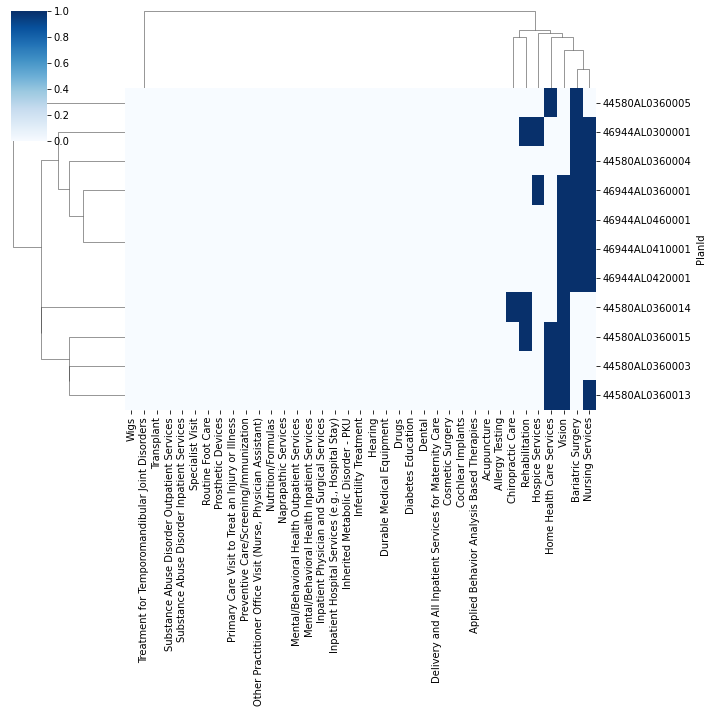

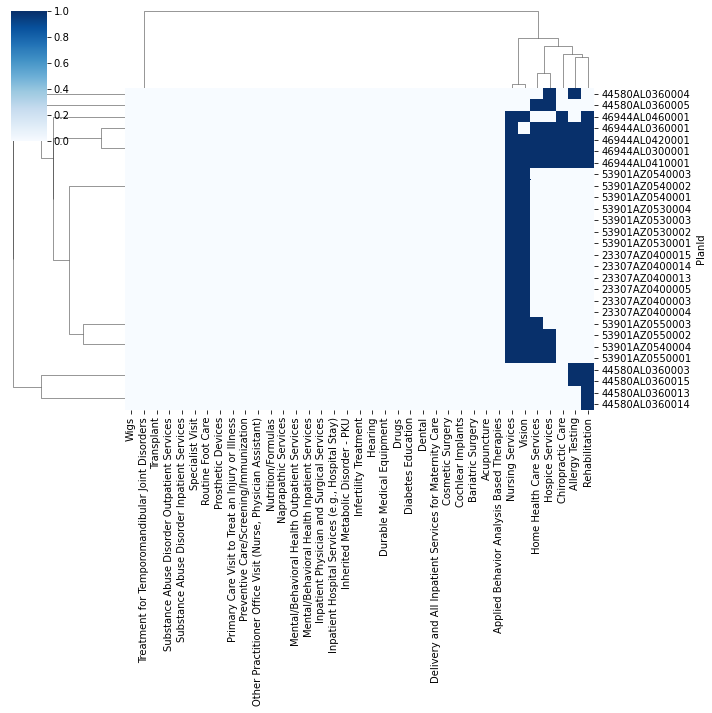

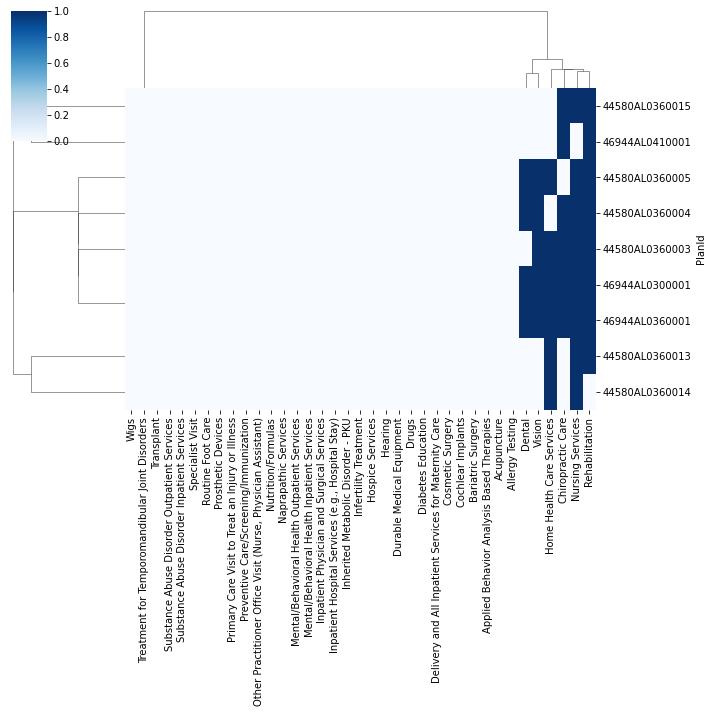

In [20]:
for i in range(len(state2)):
    sns.clustermap(state2[i], metric="jaccard", method="single", cmap="Blues")

In [34]:
x=pd.read_csv("dataset_new.csv")
x=x.set_index("PlanId")
x=(x!=0)*1
ben_list=le.inverse_transform(np.diag(np.ones(37))).flatten().tolist()
x = x.set_axis(ben_list, axis=1, inplace=False)

**K-Means**

In [35]:
X=np.array(x)
k=cluster.KMeans(n_clusters=8).fit(X)
k.predict(X)

array([3, 3, 3, ..., 2, 1, 1])

**Elbow Method**

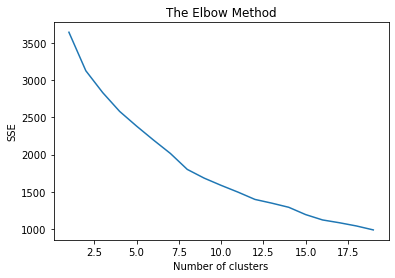

In [30]:
from sklearn.cluster import KMeans
sse = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 20),sse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [31]:
from kneed import DataGenerator, KneeLocator
kl = KneeLocator(range(1, 20), sse, curve="convex", direction="decreasing")
kl.elbow 

8

**Silehouett Score**

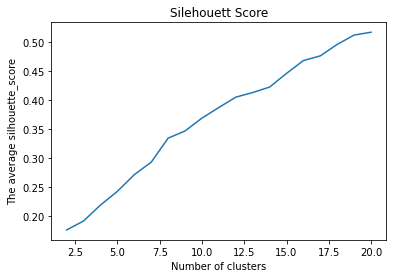

In [33]:

from sklearn.metrics import silhouette_score, silhouette_samples
silhouette = []
for i in range(2,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette.append(silhouette_avg)
plt.plot(range(2, 21),silhouette)
plt.title('Silehouett Score')
plt.xlabel('Number of clusters')
plt.ylabel('The average silhouette_score')
plt.show()

**DBSCAN**

In [34]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn import metrics
db = DBSCAN(eps=0.3, min_samples=20,metric='jaccard').fit(X)
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
sample_cores=np.zeros_like(labels,dtype=bool)
sample_cores[db.core_sample_indices_]=True
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)


print("Estimated number of clusters: %d" % n_clusters_)

Estimated number of clusters: 13


In [35]:
range_eps = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in range_eps:
    db = DBSCAN(eps=i, min_samples=20).fit(X)
    labels = db.labels_
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    silhouette_avg = silhouette_score(X, labels)
    print("For eps value =" + str(i), "The average silhouette_score is :", silhouette_avg)

For eps value =0.1 The average silhouette_score is : 0.48933153161196263
For eps value =0.2 The average silhouette_score is : 0.48933153161196263
For eps value =0.3 The average silhouette_score is : 0.48933153161196263
For eps value =0.4 The average silhouette_score is : 0.48933153161196263
For eps value =0.5 The average silhouette_score is : 0.48933153161196263
For eps value =0.6 The average silhouette_score is : 0.48933153161196263
For eps value =0.7 The average silhouette_score is : 0.48933153161196263
For eps value =0.8 The average silhouette_score is : 0.48933153161196263
For eps value =0.9 The average silhouette_score is : 0.48933153161196263


In [36]:
for i in range(1,21):
    db = DBSCAN(eps=0.3, min_samples=i).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = set([label for label in db.labels_ if label >= 0])
    print("For min_samples value ="+str(i), "Total number of clusters are " + str(len(set(labels))))

For min_samples value =1 Total number of clusters are 120
For min_samples value =2 Total number of clusters are 100
For min_samples value =3 Total number of clusters are 80
For min_samples value =4 Total number of clusters are 72
For min_samples value =5 Total number of clusters are 64
For min_samples value =6 Total number of clusters are 61
For min_samples value =7 Total number of clusters are 55
For min_samples value =8 Total number of clusters are 53
For min_samples value =9 Total number of clusters are 46
For min_samples value =10 Total number of clusters are 44
For min_samples value =11 Total number of clusters are 40
For min_samples value =12 Total number of clusters are 38
For min_samples value =13 Total number of clusters are 36
For min_samples value =14 Total number of clusters are 32
For min_samples value =15 Total number of clusters are 27
For min_samples value =16 Total number of clusters are 27
For min_samples value =17 Total number of clusters are 24
For min_samples value

**Hierarchical Clustering**

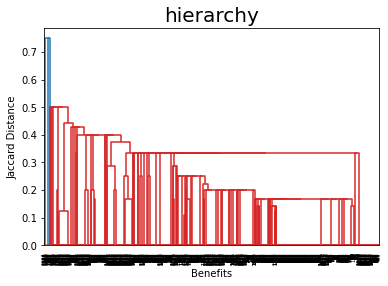

In [123]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X,metric = "jaccard", method = 'single'))
plt.title('hierarchy', fontsize = 20)
plt.xlabel('Benefits')
plt.ylabel('Jaccard Distance')
plt.show()

**Agglomerative Clustering**

In [119]:
from sklearn.cluster import AgglomerativeClustering 
ac = AgglomerativeClustering(n_clusters =13, affinity = 'jaccard', linkage ='average')
y_ac = ac.fit_predict(X)
y_ac

array([3, 3, 3, ..., 0, 0, 0], dtype=int64)

In [23]:
df1 =df.loc[:1571,["PlanId","BenefitName","IndividualRate"]]

In [31]:
X = np.asarray(df1)

In [32]:
X

array([['44580AL0360003', 'Rehabilitation', 126.73],
       ['44580AL0360003', 'Rehabilitation', 199.59],
       ['44580AL0360003', 'Rehabilitation', 199.59],
       ...,
       ['44580AL0360015', 'Vision', 254.71],
       ['44580AL0360015', 'Vision', 259.75],
       ['44580AL0360015', 'Vision', 265.85]], dtype=object)

In [24]:
import gower

distance_matrix = gower.gower_matrix(df1)

In [25]:
distance_matrix

array([[0.        , 0.03767244, 0.03767244, ..., 0.73283905, 0.73544496,
        0.738599  ],
       [0.03767244, 0.        , 0.        , ..., 0.6951666 , 0.69777256,
        0.70092654],
       [0.03767244, 0.        , 0.        , ..., 0.6951666 , 0.69777256,
        0.70092654],
       ...,
       [0.73283905, 0.6951666 , 0.6951666 , ..., 0.        , 0.00260594,
        0.00575996],
       [0.73544496, 0.69777256, 0.69777256, ..., 0.00260594, 0.        ,
        0.00315402],
       [0.738599  , 0.70092654, 0.70092654, ..., 0.00575996, 0.00315402,
        0.        ]], dtype=float32)

In [120]:
from sklearn.cluster import AgglomerativeClustering
model_single = AgglomerativeClustering(n_clusters=13, linkage='average', affinity='precomputed')
clusters_single = model_single.fit_predict(distance_matrix)

In [121]:
from sklearn.metrics.cluster import adjusted_rand_score
cri = adjusted_rand_score(y_ac, clusters_single)

In [122]:
cri

0.04379635514883942